<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220612_mtcars_%EB%81%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----------------------------------------------------------------------------
20220612일 숙제<br>
**1.1** 4기통인 자동차의 백분율을 구하시오<br>
**1.2** 변속 기어수가 4이고, 수동 변속기인 데이터에서 자동차 연비의 평균값과 마력의 표준편차의 합계를 구하시오<br>
**1.3** hp 값을 예측하기 위한 분석을 실시하시오(lm, glm 2가지).

----------------------------------------------------------------------------

# 1. 라이브러리 및 데이터 로드

In [2]:
install.packages(c("tidymodels","tidyverse","lubridate","skimr","magrittr","data.table","gridExtra","ggplot2","pacman","esquisse"))
pacman::p_load("tidymodels","tidyverse","lubridate","skimr","magrittr","data.table","gridExtra","pacman","esquisse")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘workflowsets’




In [83]:
df=mtcars

# 2. BASIC EDA

In [ ]:
#install.packages("esquisse")
#library(esquisse)

In [ ]:
install.packages("DataExplorer")
library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             32    
Number of columns          11    
_______________________          
Column type frequency:           
  numeric                  11    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate    mean      sd    p0    p25    p50
 1 mpg                   0             1  20.1     6.03  10.4   15.4   19.2 
 2 cyl                   0             1   6.19    1.79   4      4      6   
 3 disp                  0             1 231.    124.    71.1  121.   196.  
 4 hp                    0             1 147.     68.6   52     96.5  123   
 5 drat                  0             1   3.60    0.535  2.76   3.08   3.70
 6 wt                    0             1   3.22    0.978  1.51   2.58   3.32
 7 qsec                  0      

In [ ]:
glimpse(df)

Rows: 32
Columns: 11
$ mpg  <dbl> 21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,…
$ cyl  <dbl> 6, 6, 4, 6, 8, 6, 8, 4, 4, 6, 6, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 8,…
$ disp <dbl> 160.0, 160.0, 108.0, 258.0, 360.0, 225.0, 360.0, 146.7, 140.8, 16…
$ hp   <dbl> 110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180…
$ drat <dbl> 3.90, 3.90, 3.85, 3.08, 3.15, 2.76, 3.21, 3.69, 3.92, 3.92, 3.92,…
$ wt   <dbl> 2.620, 2.875, 2.320, 3.215, 3.440, 3.460, 3.570, 3.190, 3.150, 3.…
$ qsec <dbl> 16.46, 17.02, 18.61, 19.44, 17.02, 20.22, 15.84, 20.00, 22.90, 18…
$ vs   <dbl> 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,…
$ am   <dbl> 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,…
$ gear <dbl> 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3,…
$ carb <dbl> 4, 4, 1, 1, 2, 1, 4, 2, 2, 4, 4, 3, 3, 3, 4, 4, 4, 1, 2, 1, 1, 2,…


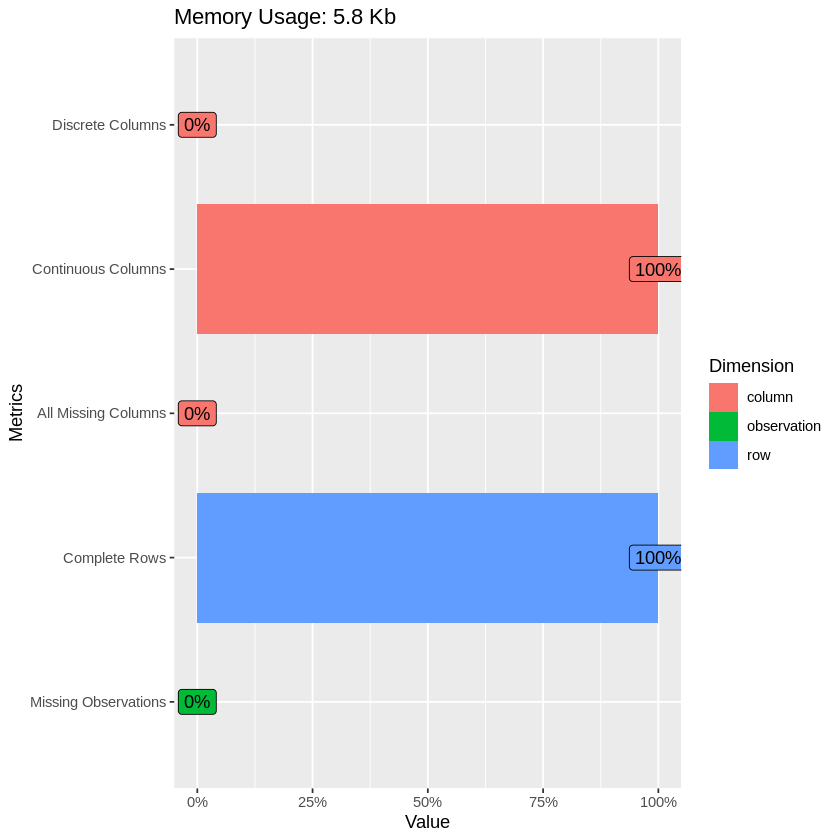

In [ ]:
plot_intro(df)

1. NA없음
2. 모두 int로 저장됨

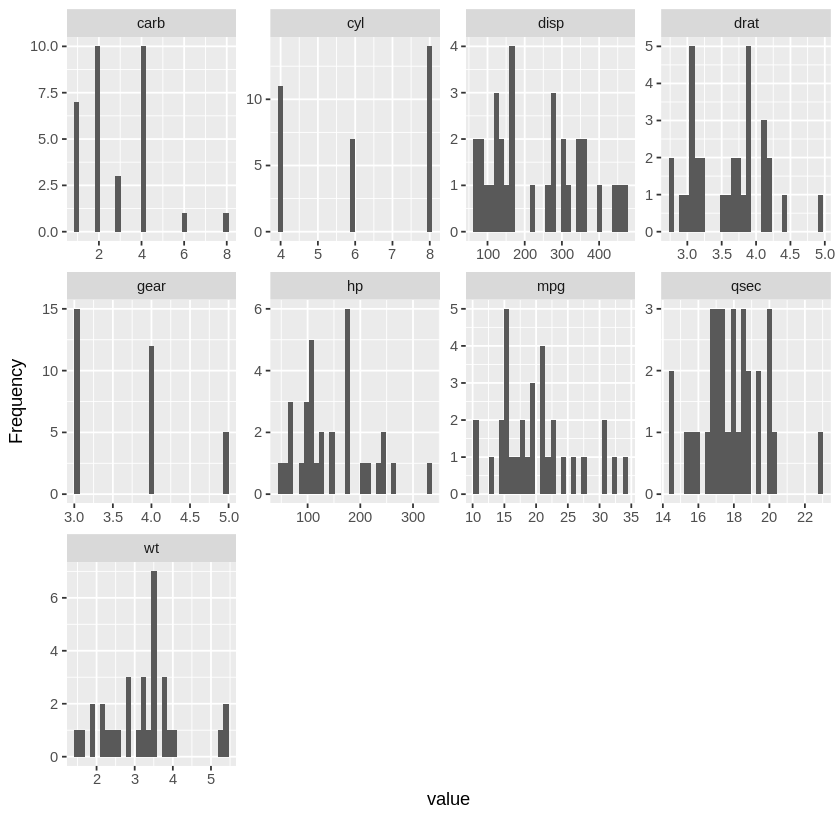

In [ ]:
plot_histogram(df)

- carb, cyl, gear 변수 클래스 비율 확인 가능

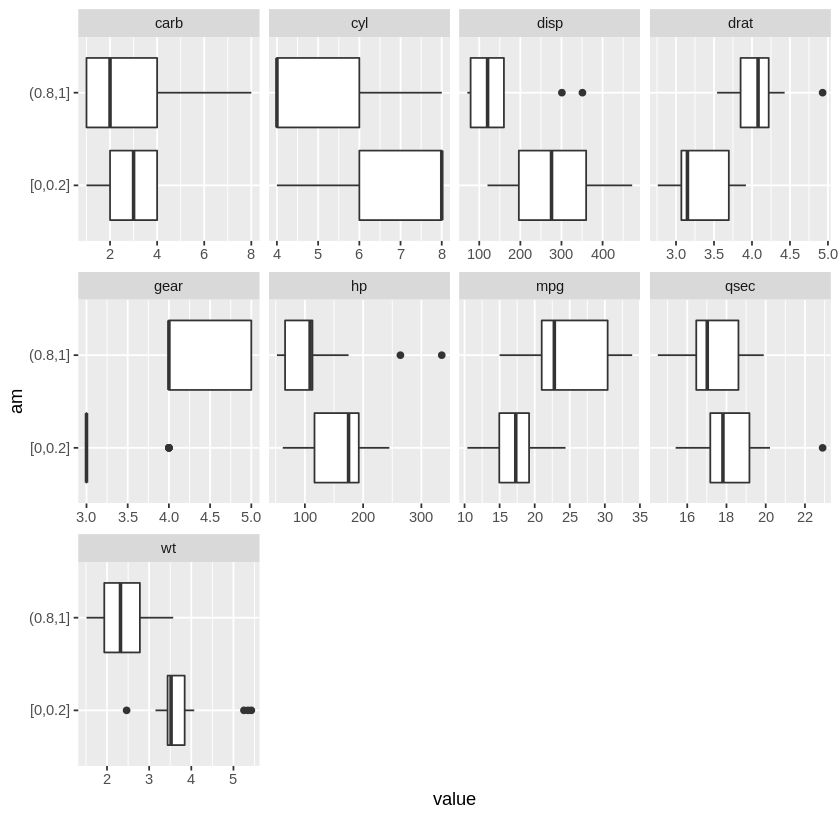

In [ ]:
plot_boxplot(df, by="am")

* 변속기 유형에 따른 박스플랏
* factor변환 안함
* 변속기 유형 (자동,수동) 에 영향 미치는 변수는 carb(자동차 기화기 수), qsec(도달시간) 제외하고 대부분

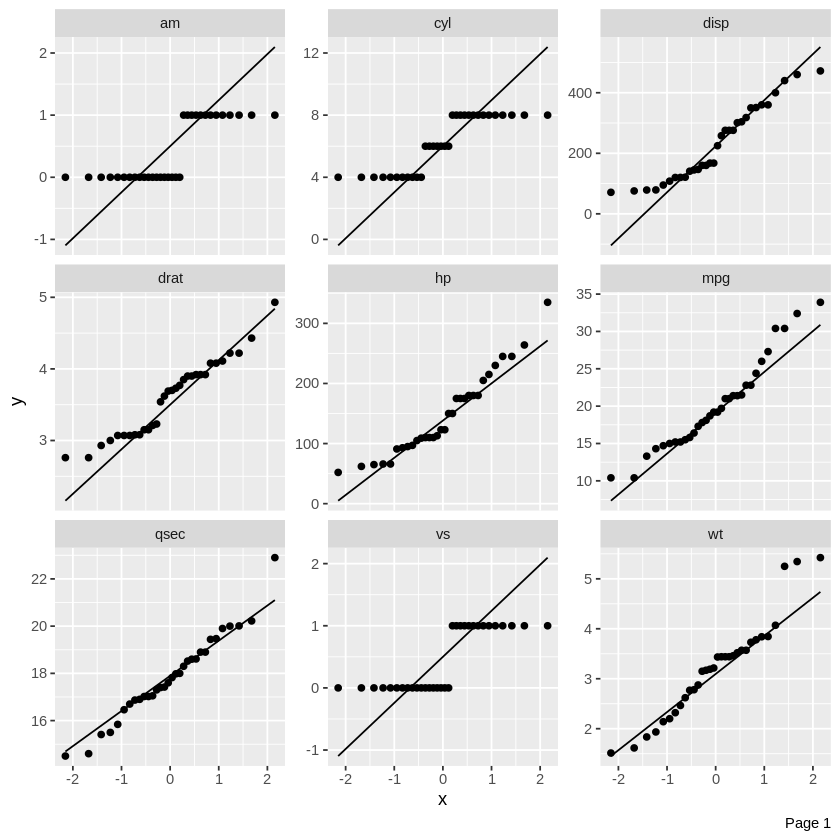

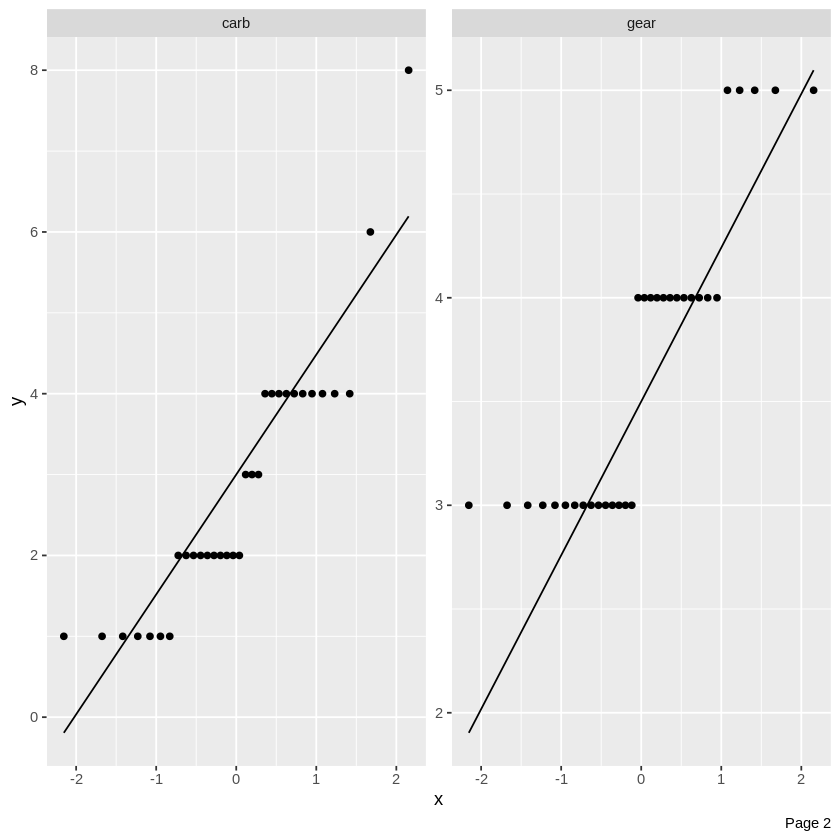

In [ ]:
plot_qq(df)

* discrete 제외한 변수 모두 정규성 만족 확인

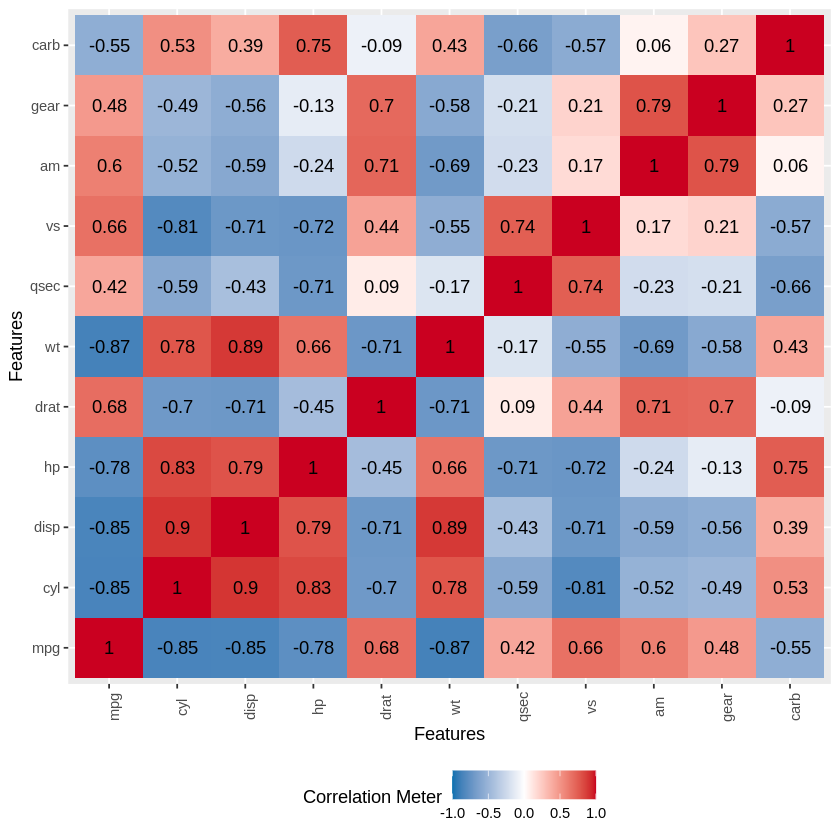

In [ ]:
plot_correlation(na.omit(df))

- `hp와 높은 상관관계 있는 변수`: cyl(0.83), disp(0.79), carb(0.75), wt(0.66) 중요변수 예상
-  그 외 wt와 disp 사용한 파생 변수 생성 가능성 
- gear, am, draft로도 가능

In [ ]:
#install.packages("corrplot")
#library(corrplot)

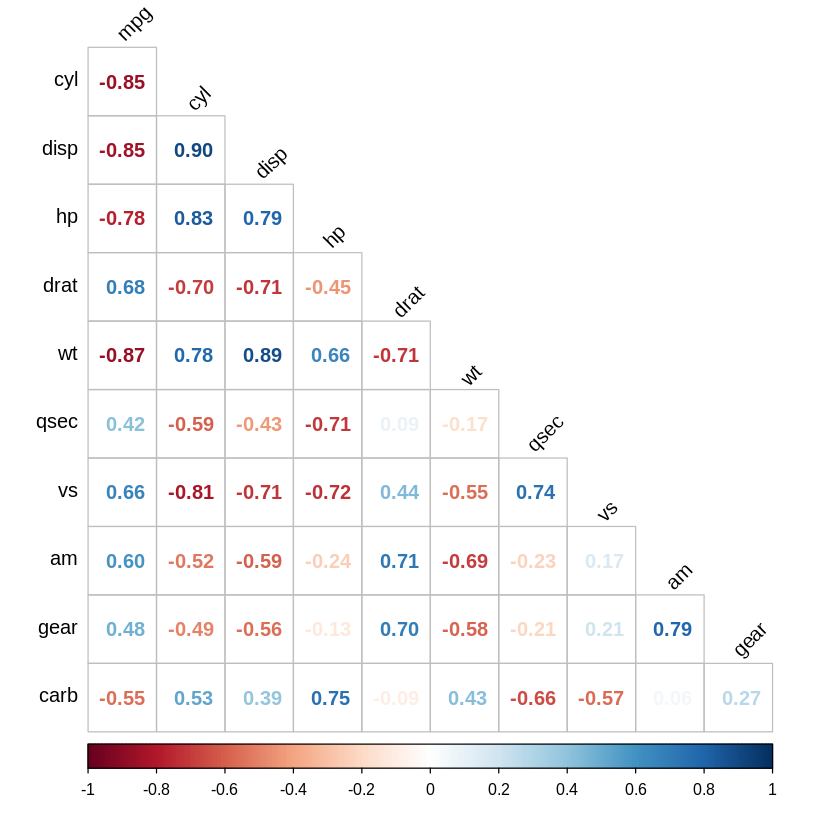

In [ ]:
cor=cor(df)
corrplot(cor, method="number", type="lower", diag=FALSE, tl.col="black", tl.srt = 45)

1. 가장 높은 상관관계가 있는 변수 cyl(0.83)는 discrete변수로  클래스가 3개인 팩터형으로 볼 수 있음
2. carb 역시 클래스 8개인 팩터로 볼 수 있음
2. 이에 추가 EDA 진행
3. 분포 확인후 hp에 대한 범주 생성





In [ ]:
#skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             32    
Number of columns          11    
_______________________          
Column type frequency:           
  numeric                  11    
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate    mean      sd    p0    p25    p50
 1 mpg                   0             1  20.1     6.03  10.4   15.4   19.2 
 2 cyl                   0             1   6.19    1.79   4      4      6   
 3 disp                  0             1 231.    124.    71.1  121.   196.  
 4 hp                    0             1 147.     68.6   52     96.5  123   
 5 drat                  0             1   3.60    0.535  2.76   3.08   3.70
 6 wt                    0             1   3.22    0.978  1.51   2.58   3.32
 7 qsec                  0      

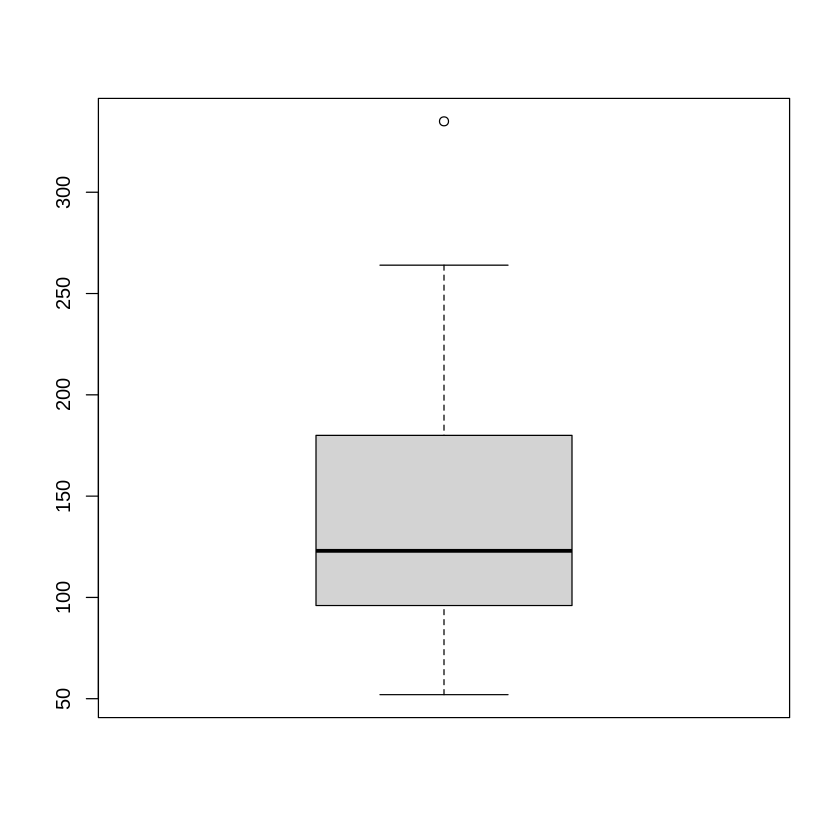

In [ ]:
boxplot(df$hp)

In [ ]:
df %>% mutate(
          cyl=as.factor(cyl), 
          carb=as.factor(carb),
          hp= case_when(
                              hp < 96.5 ~ "low",
                              hp >=96.5 & hp <=180  ~ "average",
                              TRUE ~ "high")
      ) -> p_df

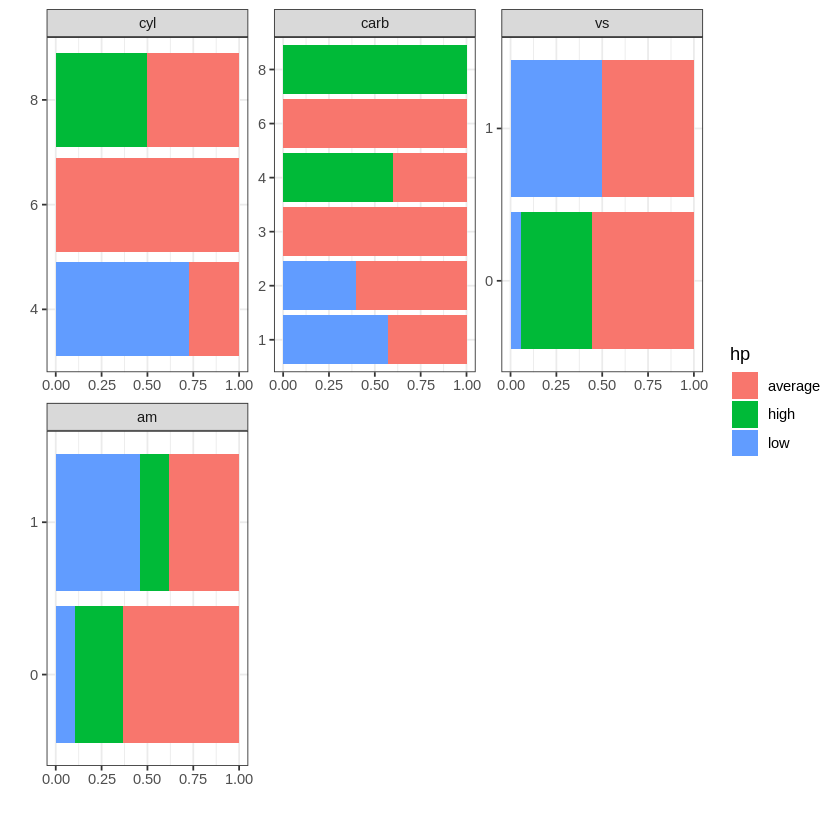

In [ ]:
plot_bar(p_df,by ='hp', order_bar = FALSE,
              ggtheme = theme_bw())
#order_bar=FALSE

- cyl, carb가 클수록 hp 높은거 확인

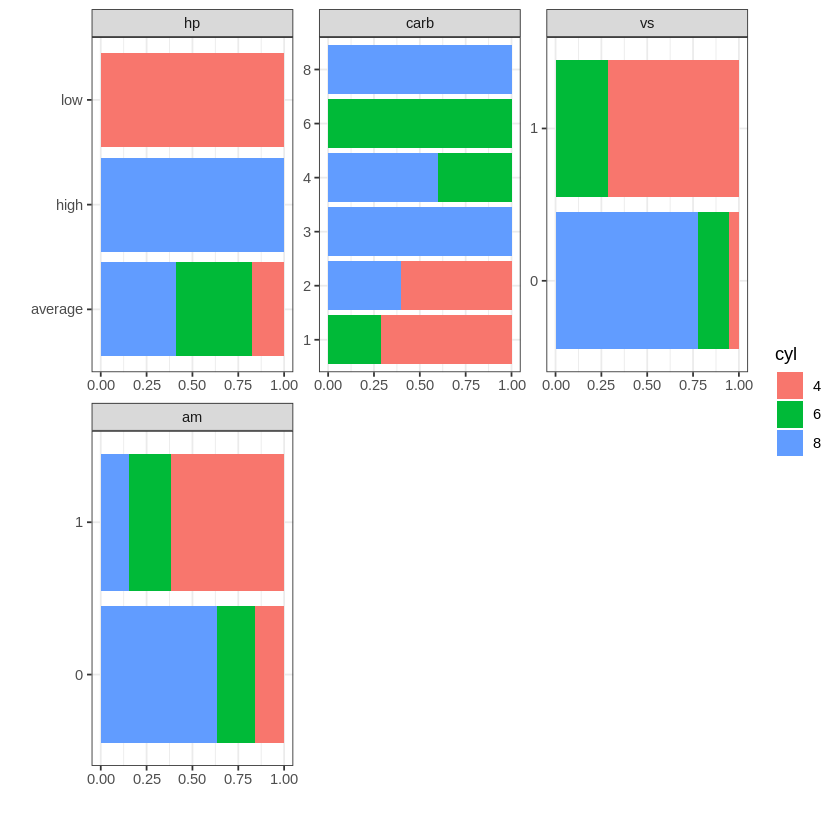

In [ ]:
plot_bar(p_df,by ='cyl', order_bar = FALSE,
              ggtheme = theme_bw())

hp에대해 양상관 확인 

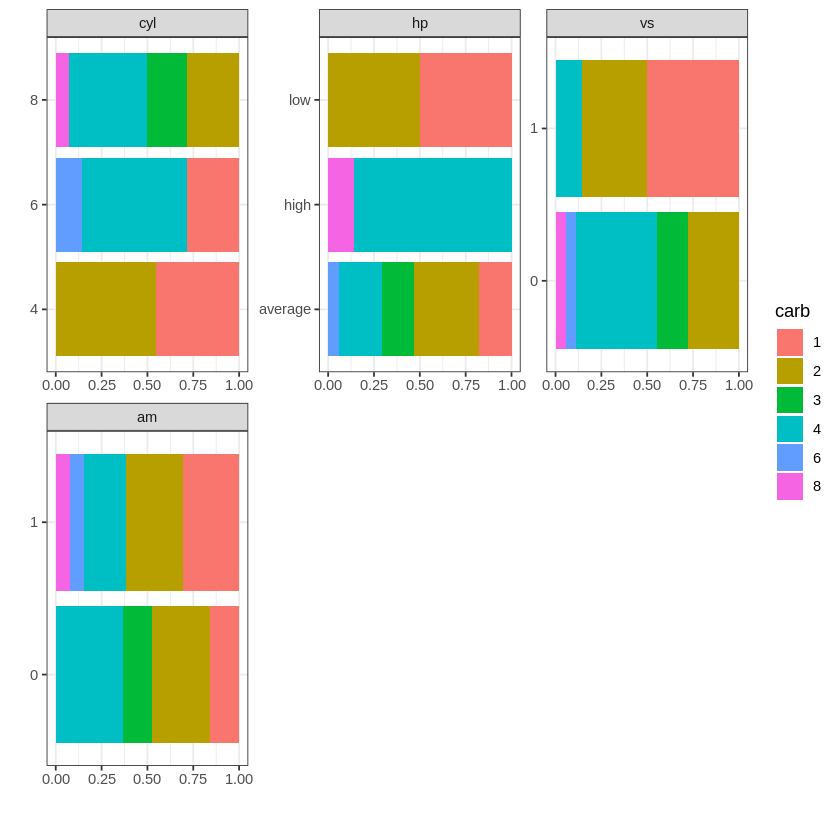

In [ ]:
plot_bar(p_df,by ='carb', order_bar = FALSE,
              ggtheme = theme_bw())

In [ ]:
# 팩터만 변경
df %>% mutate(
          cyl=as.factor(cyl), 
          carb=as.factor(carb)
             ) -> p_df2

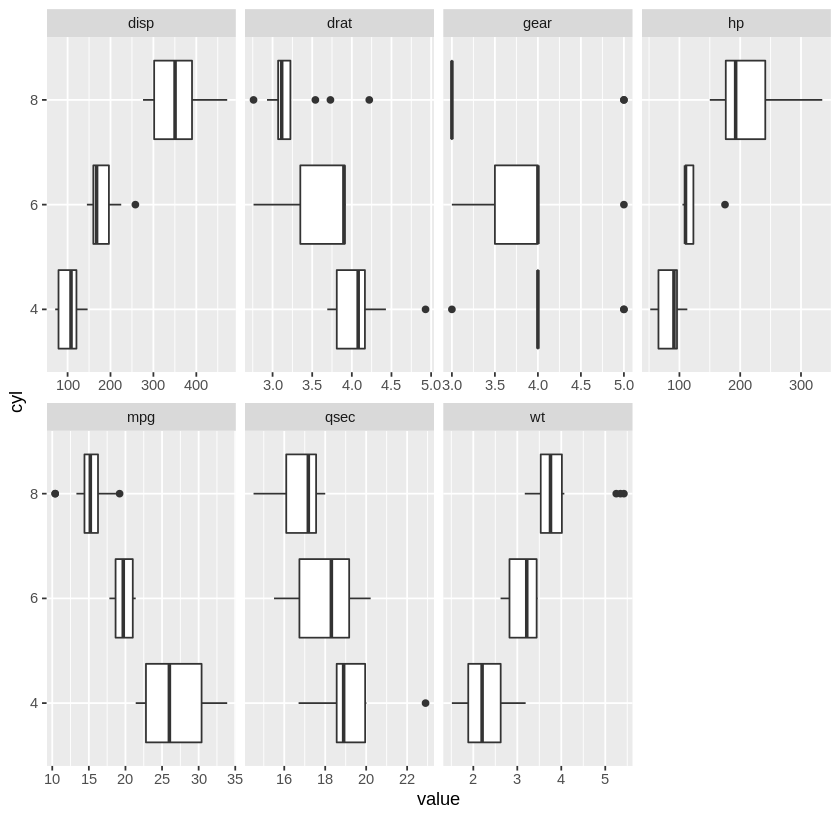

In [ ]:
plot_boxplot(p_df2, by="cyl")

양상관/ 음상관 분표 확인 가능<br>
hp에 대해서는 양상관

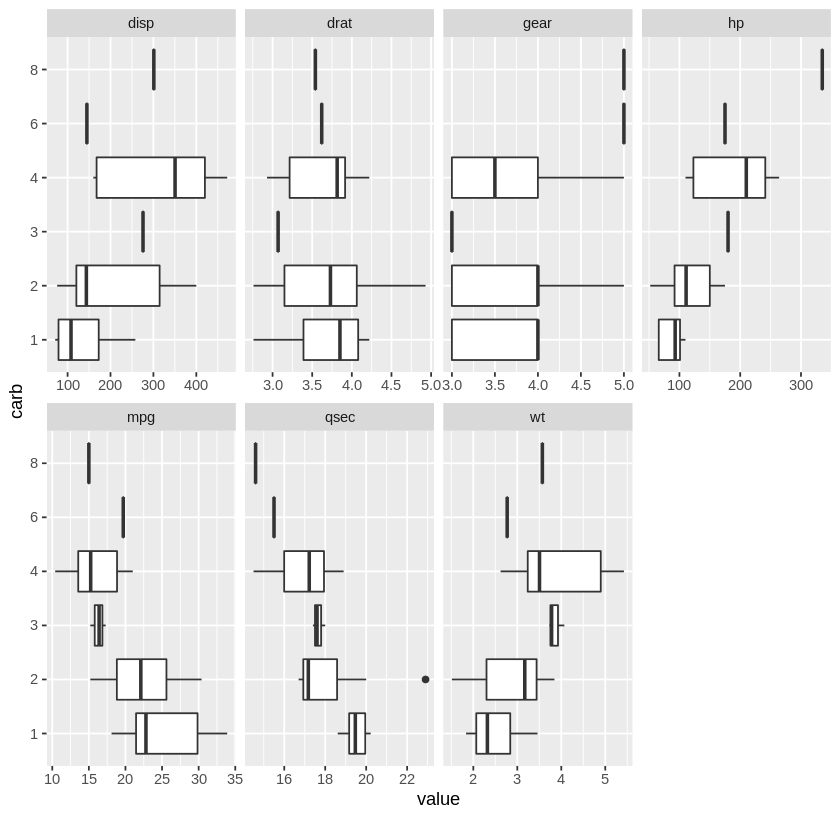

In [ ]:
plot_(p_df2, by="carb")

- hp에 대해 변화가 유의미헀다.

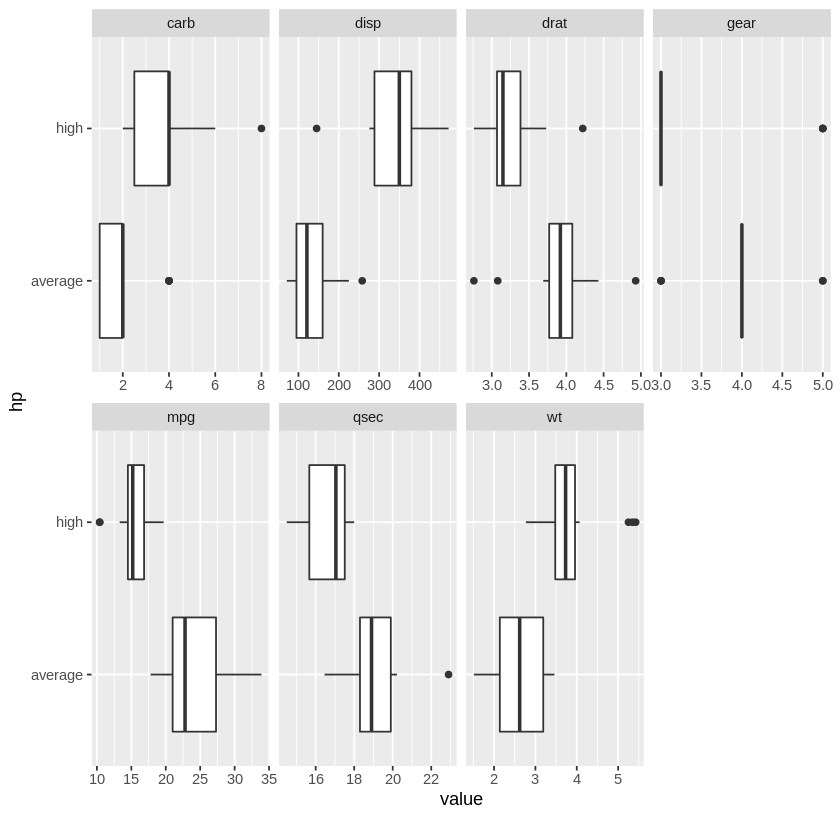

In [ ]:
plot_boxplot(p_df, by="hp")

- 상관분석에서 상관계수가 높은 cly, carb 변수를 제외한 나머지 모둔 7개 변수 hp에 영향 미침
- low는 안보임

In [ ]:
split_columns(df) %>% str # 모두 con

List of 5
 $ discrete       :'data.frame':	0 obs. of  0 variables
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ continuous     :'data.frame':	32 obs. of  11 variables:
  ..$ mpg : num [1:32] 21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
  ..$ cyl : num [1:32] 6 6 4 6 8 6 8 4 4 6 ...
  ..$ disp: num [1:32] 160 160 108 258 360 ...
  ..$ hp  : num [1:32] 110 110 93 110 175 105 245 62 95 123 ...
  ..$ drat: num [1:32] 3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
  ..$ wt  : num [1:32] 2.62 2.88 2.32 3.21 3.44 ...
  ..$ qsec: num [1:32] 16.5 17 18.6 19.4 17 ...
  ..$ vs  : num [1:32] 0 0 1 1 0 1 0 1 1 1 ...
  ..$ am  : num [1:32] 1 1 1 0 0 0 0 0 0 0 ...
  ..$ gear: num [1:32] 4 4 4 3 3 3 3 4 4 4 ...
  ..$ carb: num [1:32] 4 4 1 1 2 1 4 2 2 4 ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ num_discrete   : int 0
 $ num_continuous : int 11
 $ num_all_missing: int 0


In [ ]:
#split_columns(p_df) %>% str 

List of 5
 $ discrete       :'data.frame':	32 obs. of  3 variables:
  ..$ cyl : Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
  ..$ hp  : chr [1:32] "average" "average" "low" "average" ...
  ..$ carb: Factor w/ 6 levels "1","2","3","4",..: 4 4 1 1 2 1 4 2 2 4 ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ continuous     :'data.frame':	32 obs. of  8 variables:
  ..$ mpg : num [1:32] 21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
  ..$ disp: num [1:32] 160 160 108 258 360 ...
  ..$ drat: num [1:32] 3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
  ..$ wt  : num [1:32] 2.62 2.88 2.32 3.21 3.44 ...
  ..$ qsec: num [1:32] 16.5 17 18.6 19.4 17 ...
  ..$ vs  : num [1:32] 0 0 1 1 0 1 0 1 1 1 ...
  ..$ am  : num [1:32] 1 1 1 0 0 0 0 0 0 0 ...
  ..$ gear: num [1:32] 4 4 4 3 3 3 3 4 4 4 ...
  ..- attr(*, ".internal.selfref")=<externalptr> 
 $ num_discrete   : int 3
 $ num_continuous : int 8
 $ num_all_missing: int 0


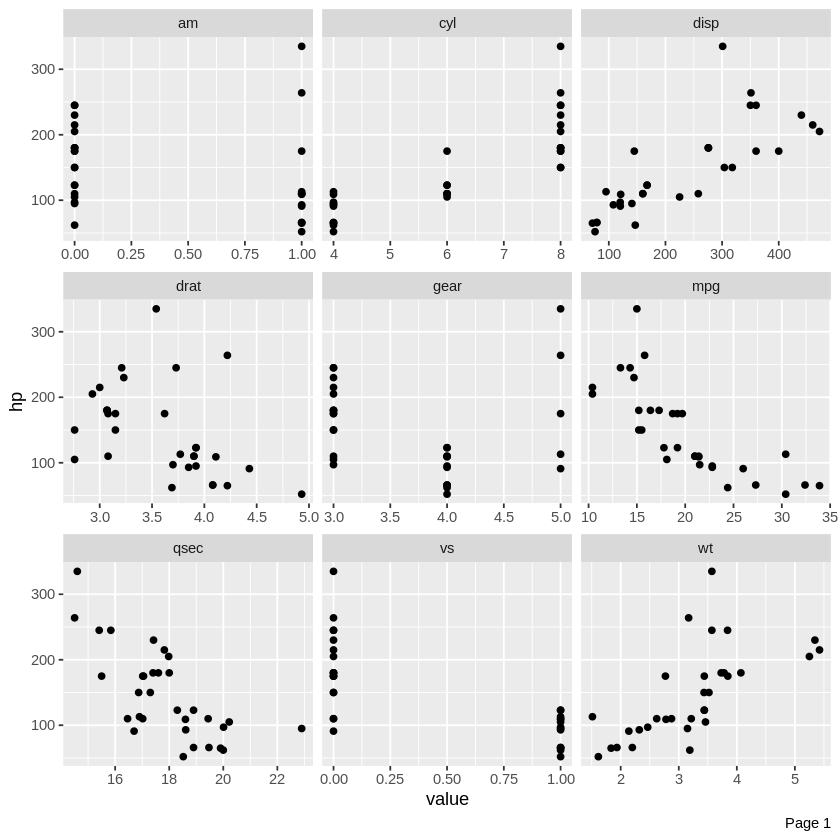

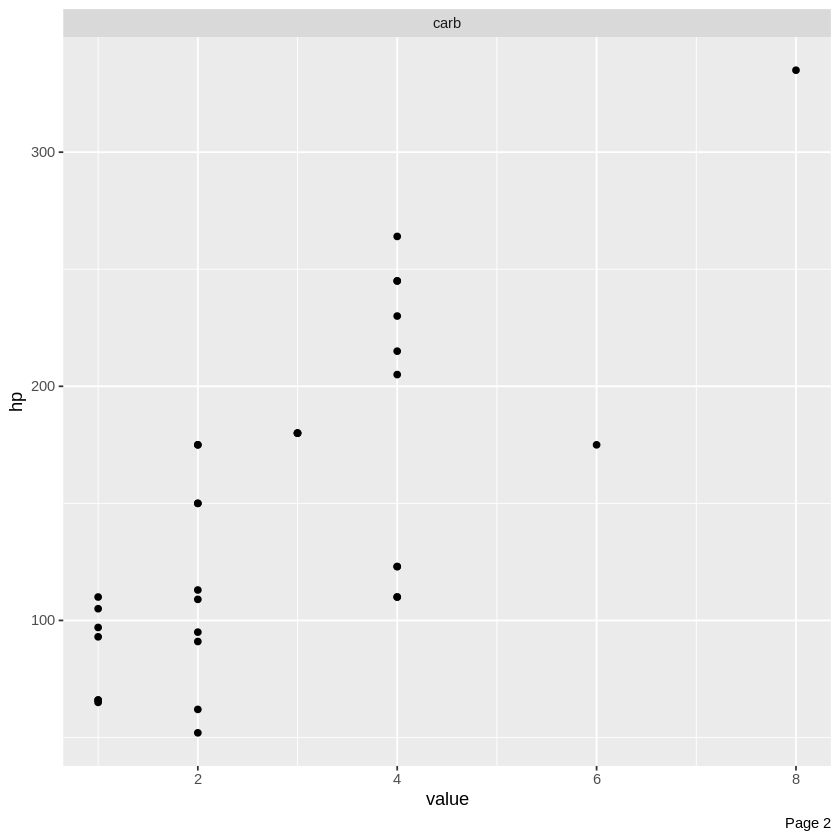

In [ ]:
plot_scatterplot(split_columns(df)$continuous,  by = "hp")

- carb 가운데가 비었당
- 상관분석 결과와 같은거 확인

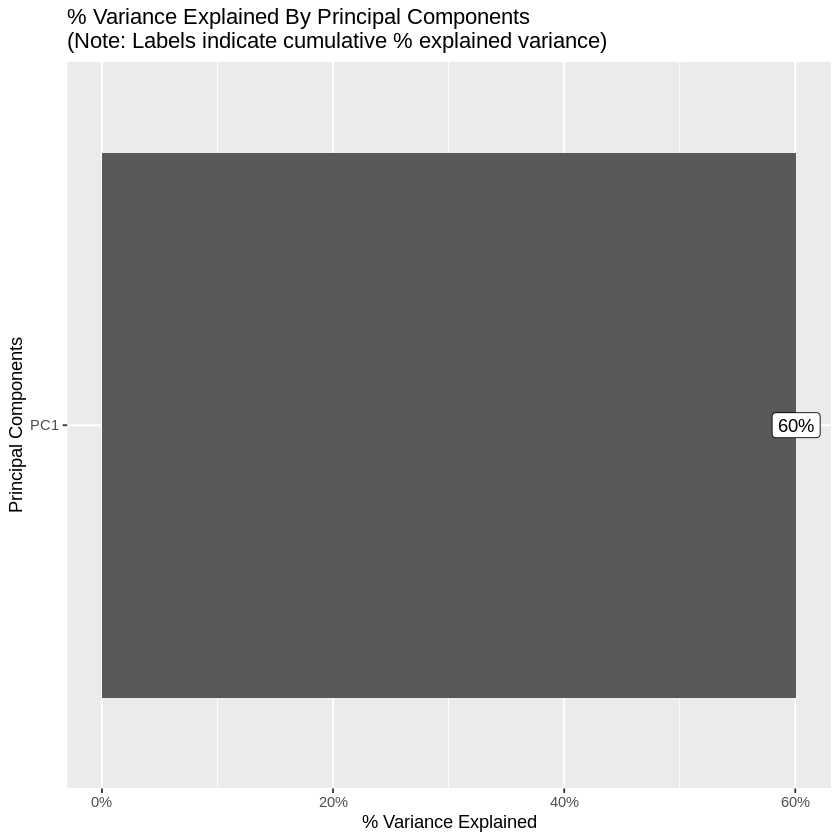

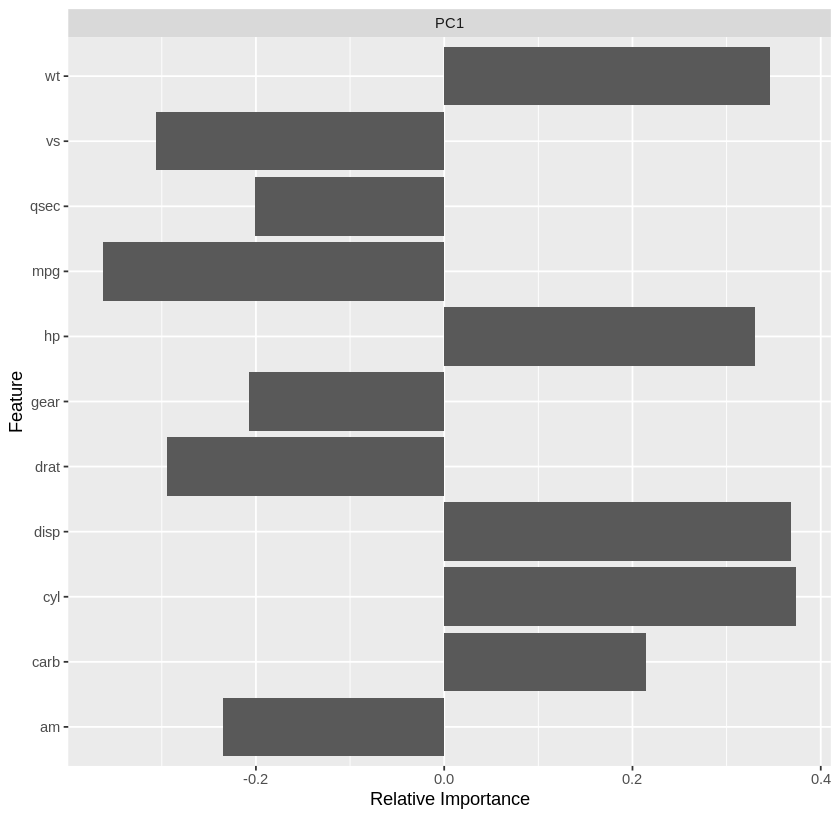

In [ ]:
plot_prcomp(df)

- pc1으로 데이터셋을 60%설명가능하고
- 상관분석 결과와 매우 유사하게 나옴 

In [ ]:
#?plot_prcomp

In [ ]:
#install.packages("psych")
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


The following objects are masked from ‘package:scales’:

    alpha, rescale




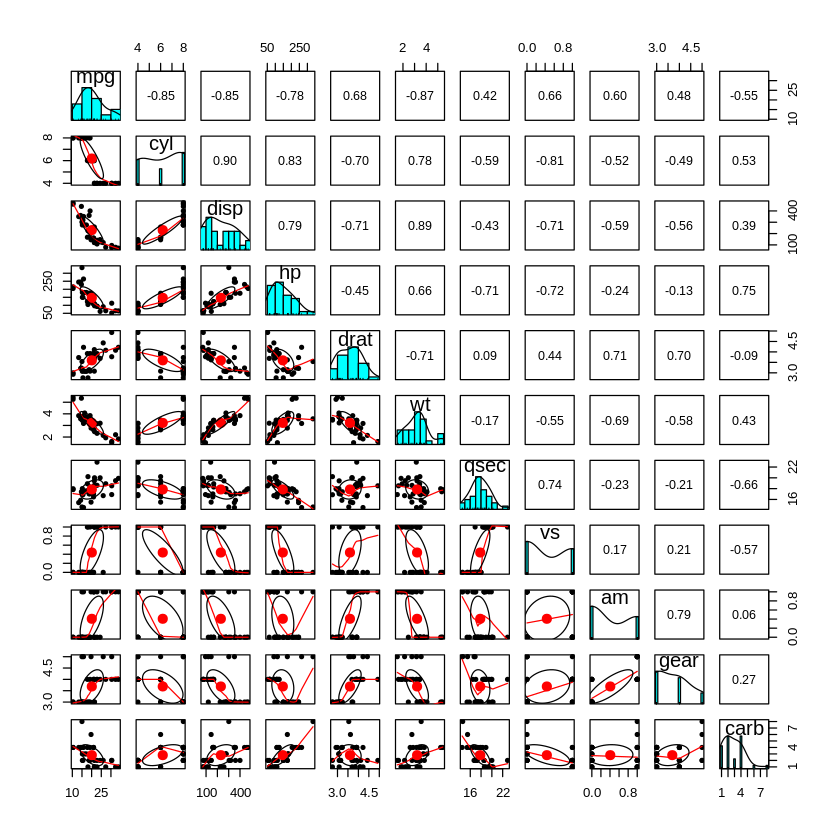

In [ ]:
pairs.panels(df)

예) qsec과 vs는 상관관계가 0.74로 높아도 뢰스곡선이 비선형 적이기 때문에 이 관계는 상관계수로 추론할 수 없음. 더 많은 EDA가 필요하다


# 3. FEATURE ENGINEERING

* 4기통인 자동차의 백분율을 구하시오


In [ ]:
#table(df$cyl) %>% prop.table %>% str
table(df$cyl) %>% prop.table -> table

In [ ]:
#table[[1]][1]*100
paste("4기통인 자동차의 백분률은","",table[[1]][1]*100,"%")

[1] "4기통인 자동차의 백분률은  34.375 %"

* 변속 기어수가 4이고, 수동 변속기인 데이터에서 자동차 연비의 평균값과 마력의 표준편차의 합계를 구하시오

gear==4, am==1, -> mean(mpg) + sd(hp)

In [ ]:
df %>% filter(gear==4 & am==1) %>%
      summarise(mean(mpg) + sd(hp))

mean(mpg) + sd(hp)
<dbl>
50.44959


In [84]:
#스케일링
#함수생성
min_max_norm<- function(x){
      (x-min(x))/(max(x)-min(x))
}

In [85]:
#적용
df %<>% mutate(across(where(is.numeric), ~ min_max_norm(.x))) 
#df %<>% mutate_if(is.numeric, min_max_norm)

# 4. MODELING

In [ ]:
glimpse(df) # 확인

Rows: 32
Columns: 11
$ mpg  <dbl> 0.4510638, 0.4510638, 0.5276596, 0.4680851, 0.3531915, 0.3276596,…
$ cyl  <dbl> 0.5, 0.5, 0.0, 0.5, 1.0, 0.5, 1.0, 0.0, 0.0, 0.5, 0.5, 1.0, 1.0, …
$ disp <dbl> 0.22175106, 0.22175106, 0.09204290, 0.46620105, 0.72062859, 0.383…
$ hp   <dbl> 0.20494700, 0.20494700, 0.14487633, 0.20494700, 0.43462898, 0.187…
$ drat <dbl> 0.52534562, 0.52534562, 0.50230415, 0.14746544, 0.17972350, 0.000…
$ wt   <dbl> 0.28304781, 0.34824853, 0.20634109, 0.43518282, 0.49271286, 0.497…
$ qsec <dbl> 0.2333333, 0.3000000, 0.4892857, 0.5880952, 0.3000000, 0.6809524,…
$ vs   <dbl> 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,…
$ am   <dbl> 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,…
$ gear <dbl> 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, …
$ carb <dbl> 0.4285714, 0.4285714, 0.0000000, 0.0000000, 0.1428571, 0.0000000,…


In [ ]:
fit=lm(hp~., df)

In [ ]:
summary(fit)


Call:
lm(formula = hp ~ ., data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.136683 -0.054976  0.002822  0.063978  0.122679 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.10441    0.18181   0.574  0.57187   
mpg         -0.17131    0.17360  -0.987  0.33496   
cyl          0.11595    0.14256   0.813  0.42513   
disp         0.62189    0.21136   2.942  0.00778 **
drat        -0.03541    0.12332  -0.287  0.77680   
wt          -0.38226    0.26631  -1.435  0.16591   
qsec        -0.05296    0.21858  -0.242  0.81089   
vs           0.09121    0.07015   1.300  0.20758   
am           0.03352    0.07336   0.457  0.65240   
gear         0.05100    0.10329   0.494  0.62662   
carb         0.46375    0.17386   2.667  0.01441 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09177 on 21 degrees of freedom
Multiple R-squared:  0.9028,	Adjusted R-squared:  0.8565 
F-statistic:  19.5 on 10

잔차진단

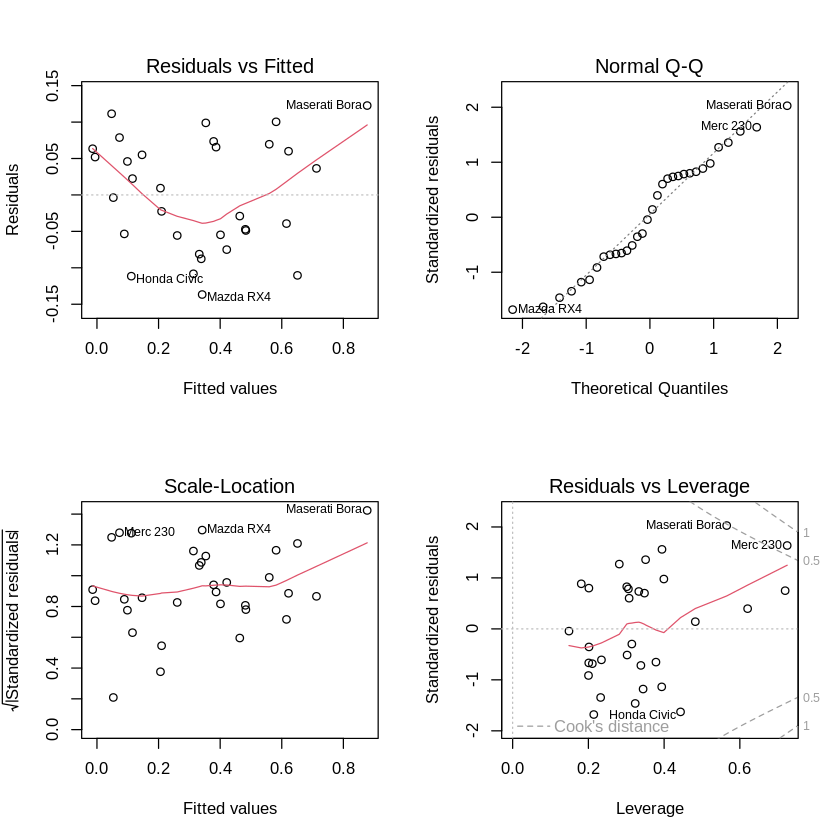

In [ ]:
par(mfrow=c(2,2))
plot(fit)

1. 등분산성 만족하지 못함-> 로에스가 레퍼런스 라인과 비교해서 non-linear함
2. 정규성 만족
3. 로에스가 약간 반등하는 것 처럼 보이지만 심각하지 않음 1.5보다 작으므로 일단 위험하지 않다고 판단
4. 쿡스디스턴스,레버리지 기준 포텐셜 아웃라이어 존재

### 쿼드라틱 해결을 위해 스퀘어항 추가

In [ ]:
#df^2 ->df2  

In [86]:
df[-4]^2 ->x_sq   #hp제거

In [87]:
#이름 함수 생성
for (i in 1:ncol(x_sq)){
  names(x_sq)[i]=paste0(names(x_sq)[i],"_sq")
  }

#print %>% names(x_sq)

In [88]:
df_sq=cbind(df, x_sq)

In [89]:
fit2=lm(hp~., df_sq)

In [90]:
summary(fit2)


Call:
lm(formula = hp ~ ., data = df_sq)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.054287 -0.012763 -0.003041  0.013716  0.061058 

Coefficients: (2 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.083112   0.159758  -0.520 0.611643    
mpg         -0.015220   0.184773  -0.082 0.935605    
cyl         -0.274560   0.124924  -2.198 0.046685 *  
disp         0.408212   0.368239   1.109 0.287712    
drat         0.456919   0.144750   3.157 0.007575 ** 
wt           0.275511   0.273110   1.009 0.331483    
qsec        -0.535780   0.309234  -1.733 0.106807    
vs           0.192985   0.035503   5.436 0.000114 ***
am           0.167418   0.046191   3.624 0.003084 ** 
gear        -0.741553   0.161600  -4.589 0.000508 ***
carb         0.467218   0.197422   2.367 0.034152 *  
mpg_sq      -0.011311   0.151192  -0.075 0.941501    
cyl_sq       0.482679   0.090519   5.332 0.000136 ***
disp_sq     -0.204403   0.278194

In [94]:
#1,0 변수의 sq항 삭제  
df_sq %<>% select(-vs_sq , -am_sq )

In [95]:
#다시 피팅
fit2= lm(hp~., df_sq) 

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


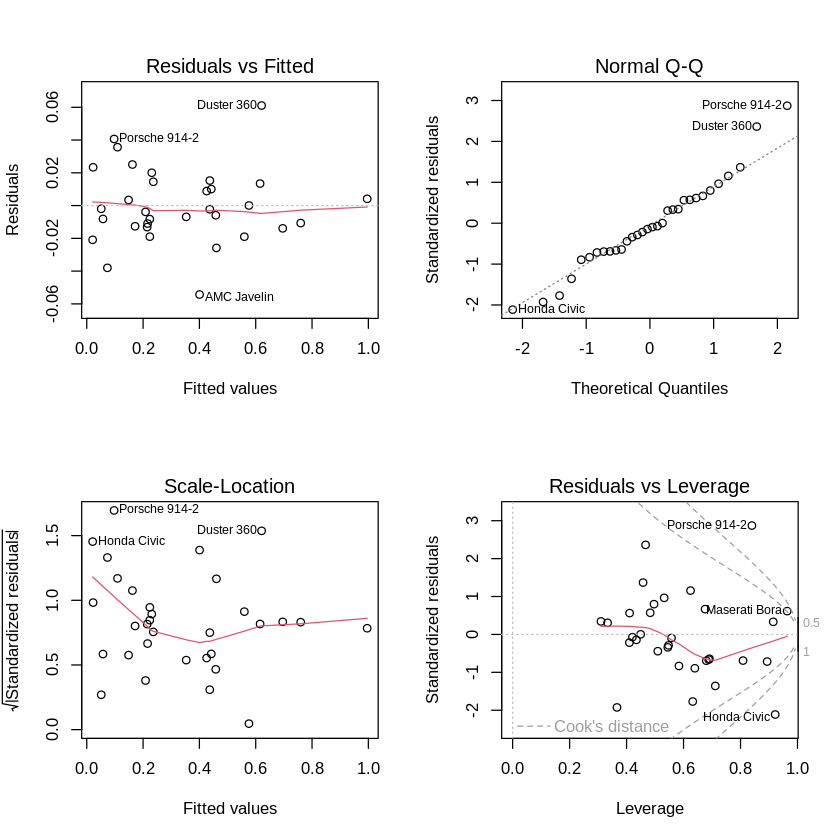

In [96]:
par(mfrow=c(2,2))
plot(fit2)

1. 등분산성은 해결됐지만
4. 레버리지 값이 증가함
3. 아웃라이어 후보들: 포르쉐, 혼다, 더스터, 마세라티



### 영향점 살펴봄

[Influential points - Cook's distance, DFFITS, DFBETAS](https://www.youtube.com/watch?v=31xA3hsxW6k)

1. DFFITS

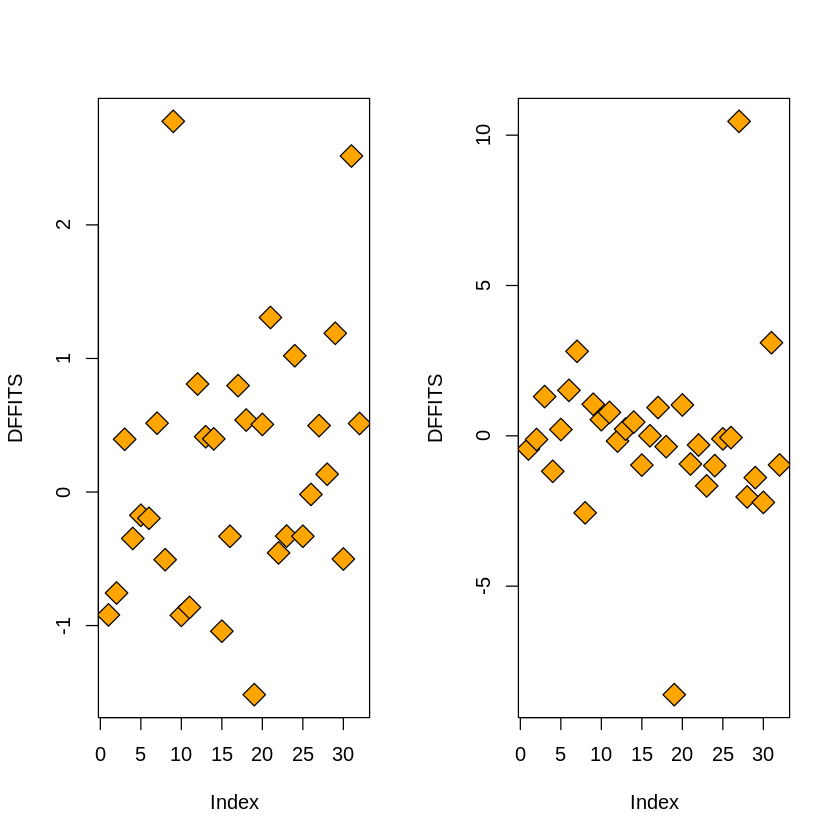

In [ ]:
#1.DFFITS
par(mfrow=c(1,2))
plot(dffits(fit), pch=23, bg='orange', cex=2, ylab="DFFITS") 
plot(dffits(fit2), pch=23, bg='orange', cex=2, ylab="DFFITS") 

In [ ]:
str(df)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  0.451 0.451 0.528 0.468 0.353 ...
 $ cyl : num  0.5 0.5 0 0.5 1 0.5 1 0 0 0.5 ...
 $ disp: num  0.222 0.222 0.092 0.466 0.721 ...
 $ hp  : num  0.205 0.205 0.145 0.205 0.435 ...
 $ drat: num  0.525 0.525 0.502 0.147 0.18 ...
 $ wt  : num  0.283 0.348 0.206 0.435 0.493 ...
 $ qsec: num  0.233 0.3 0.489 0.588 0.3 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  0.5 0.5 0.5 0 0 0 0 0.5 0.5 0.5 ...
 $ carb: num  0.429 0.429 0 0 0.143 ...


In [ ]:
p=ncol(df)
n=nrow(df)
dffit_threshold=2*sqrt(p/n)
dffit_threshold

[1] 1.172604

In [ ]:
#dffits(fit) > 0.5
#which(dffits(fit) > 0.5) #위치값
df[which( dffits(fit)%>%abs  > dffit_threshold) ,] # 해당되는 자료 뽑아냄

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Merc 230,0.5276596,0,0.17385882,0.1519435,0.5345622,0.41856303,1.00000000,1,0,0.5,0.1428571
Honda Civic,0.8510638,0,0.01147418,0.0000000,1.0000000,0.02608029,0.47857143,1,1,0.5,0.1428571
Toyota Corona,0.4723404,0,0.12222499,0.1590106,0.4331797,0.24341601,0.65595238,1,0,0.0,0.0000000
Ford Pantera L,0.2297872,1,0.69817910,0.7491166,0.6728111,0.42367681,0.00000000,0,1,1.0,0.4285714
Maserati Bora,0.1957447,1,0.57345972,1.0000000,0.3594470,0.52595244,0.01190476,0,1,1.0,1.0000000


In [ ]:
#스캐터 플랏에서 눈에 띄는 포텐셜 아웃라이어
df[which( dffits(fit)%>%abs  >2) ,]  # Merc 230, Maserati Bora

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Merc 230,0.5276596,0,0.1738588,0.1519435,0.5345622,0.4185630,1.00000000,1,0,0.5,0.1428571
Maserati Bora,0.1957447,1,0.5734597,1.0000000,0.3594470,0.5259524,0.01190476,0,1,1.0,1.0000000


In [ ]:
df[which( dffits(fit)< -1.5) ,] # Honda Civic

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Honda Civic,0.8510638,0,0.01147418,0,1,0.02608029,0.4785714,1,1,0.5,0.1428571


In [ ]:
p2=ncol(df_sq)
n2=nrow(df_sq)
dffit_threshold2=2*sqrt(p2/n2)
dffit_threshold2

[1] 1.620185

In [ ]:
df[which(dffits(fit2)%>%abs >  dffit_threshold2 ),] 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Duster 360,0.1659574,1.0,0.72062859,0.68197880,0.2073733,0.52595244,0.15952381,0,0,0.0,0.4285714
Merc 240D,0.5957447,0.0,0.18857570,0.03533569,0.4285714,0.42879059,0.65476190,1,0,0.5,0.1428571
Honda Civic,0.8510638,0.0,0.01147418,0.00000000,1.0000000,0.02608029,0.47857143,1,1,0.5,0.1428571
AMC Javelin,0.2042553,1.0,0.58094288,0.34628975,0.1797235,0.49143442,0.33333333,0,0,0.0,0.1428571
Porsche 914-2,0.6638298,0.0,0.12272387,0.13780919,0.7695853,0.16031705,0.26190476,0,1,1.0,0.1428571
Lotus Europa,0.8510638,0.0,0.05986530,0.21554770,0.4654378,0.00000000,0.28571429,1,1,1.0,0.1428571
Ferrari Dino,0.3957447,0.5,0.18433525,0.43462898,0.3963134,0.32140118,0.11904762,0,1,1.0,0.7142857
Maserati Bora,0.1957447,1.0,0.57345972,1.00000000,0.3594470,0.52595244,0.01190476,0,1,1.0,1.0000000


In [ ]:
#눈에 띄는 포텐셜 아웃라이어 
df[which(dffits(fit2)%>%abs >  10 ),] #Porsche 914-2 
df[which(dffits(fit2)%>%abs >  5 ),] #Honda Civic 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Porsche 914-2,0.6638298,0,0.1227239,0.1378092,0.7695853,0.1603171,0.2619048,0,1,1,0.1428571


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Honda Civic,0.8510638,0,0.01147418,0.0000000,1.0000000,0.02608029,0.4785714,1,1,0.5,0.1428571
Porsche 914-2,0.6638298,0,0.12272387,0.1378092,0.7695853,0.16031705,0.2619048,0,1,1.0,0.1428571


**[정리]**<br>
fit- Merc 230 > Maserati Bora > Honda Civic > Ford Pantera L> Toyota Corona (총계: 5)<br>
fit2- Porsche 914-2 > Honda Civic > Duster 360, Merc 240D, AMC Javelin, Lotus Europa, Ferrari Dino, Maserati Bora (총계:8)<br>
inner join값- Honda Civic, Maserati Bora


2. DFBETTA

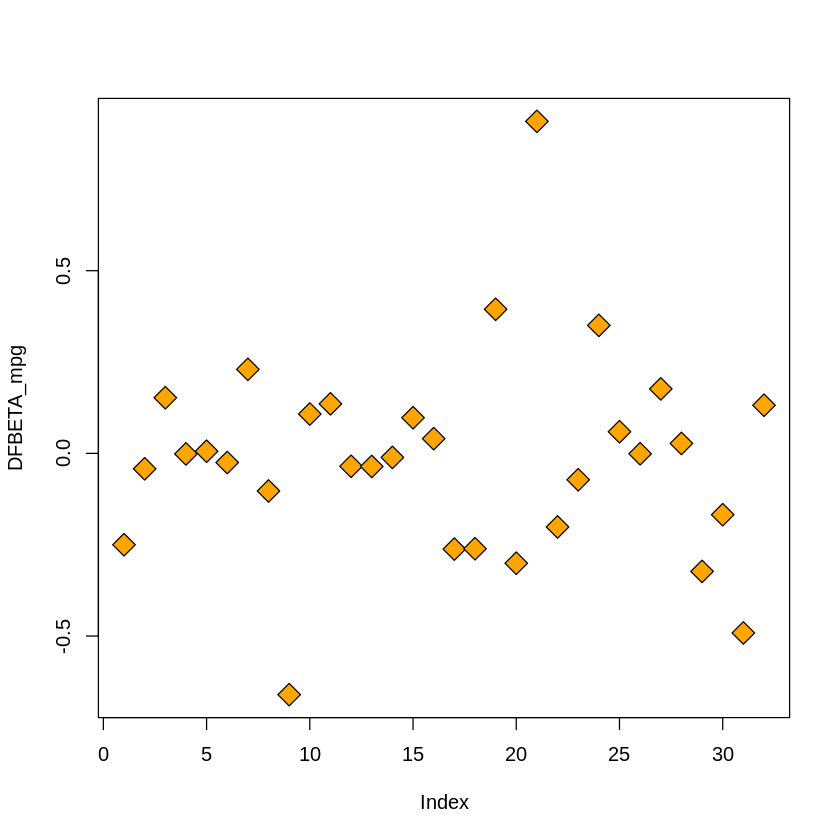

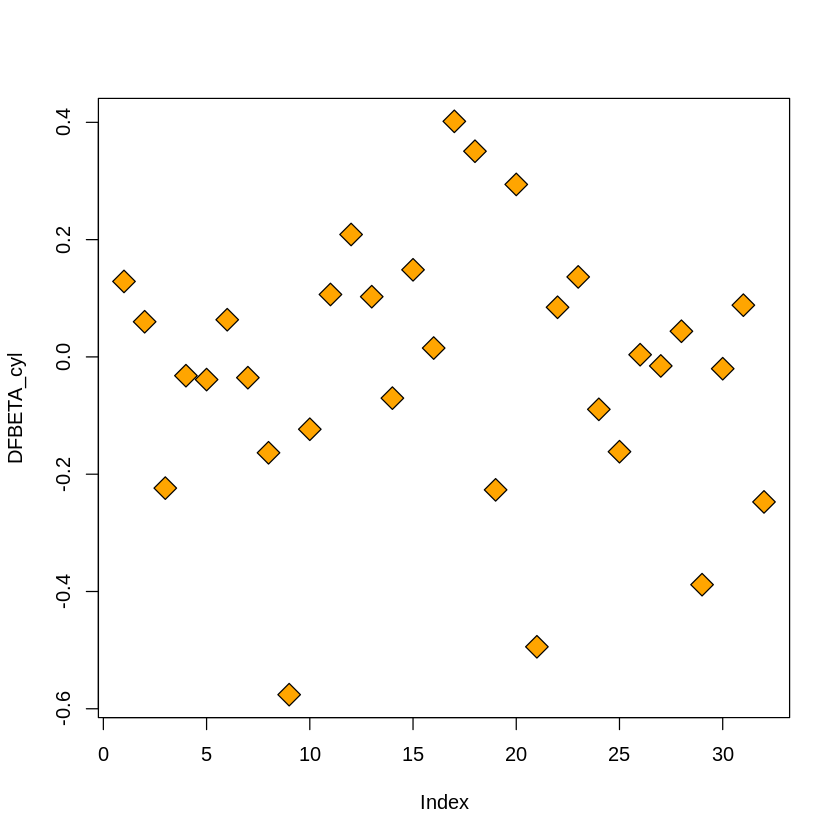

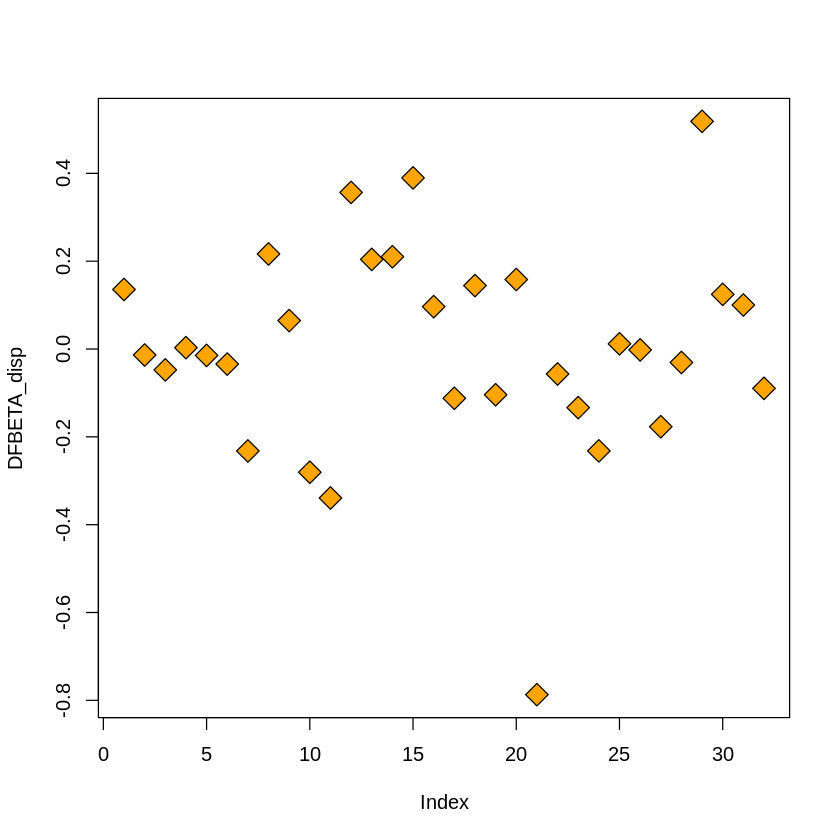

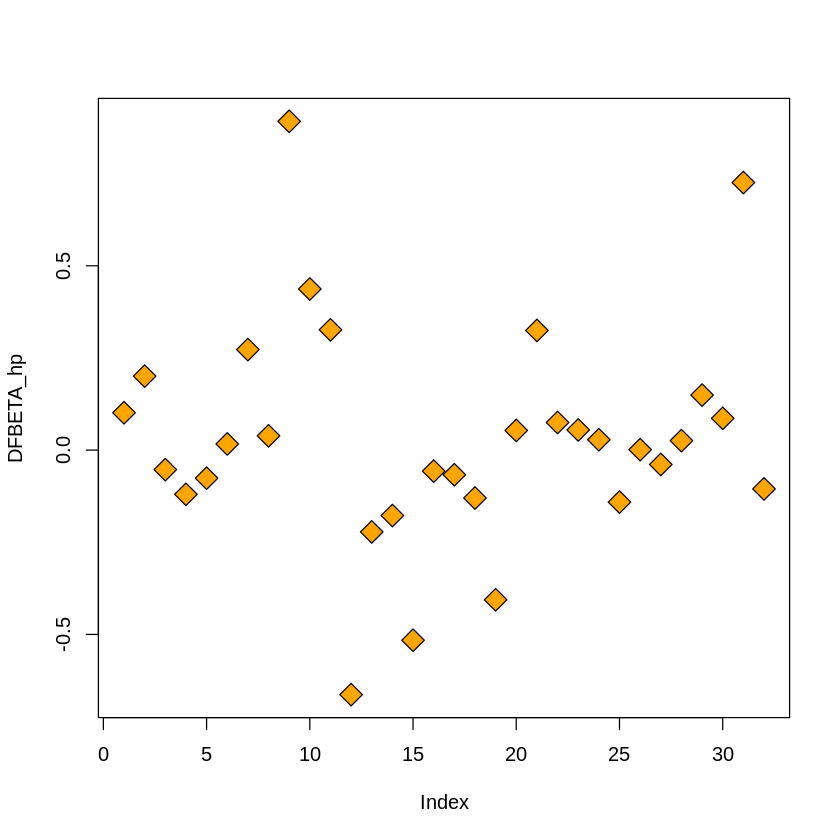

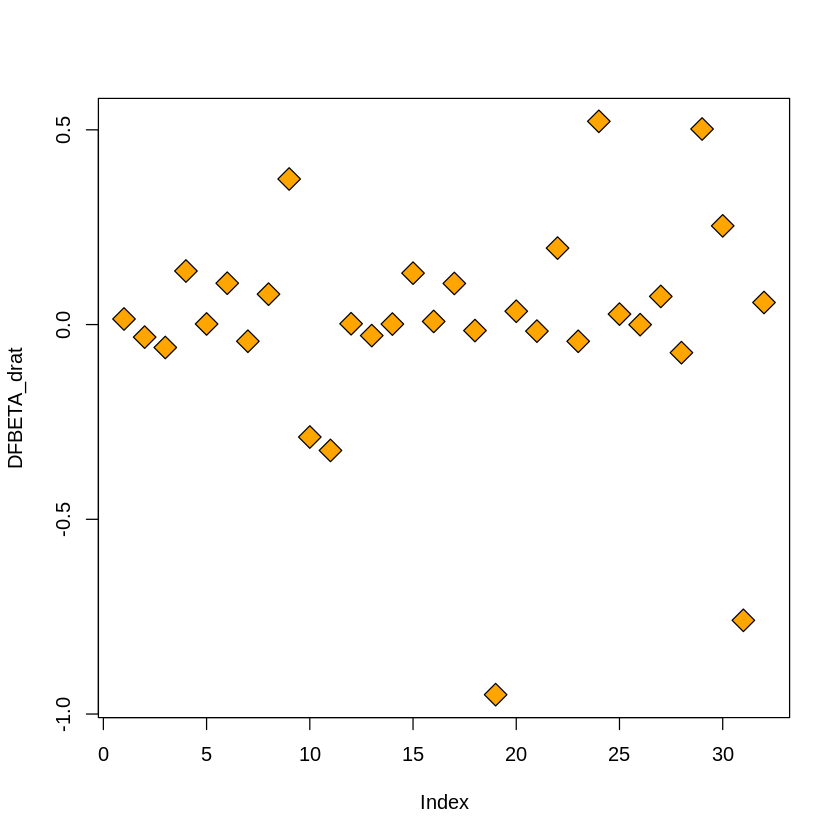

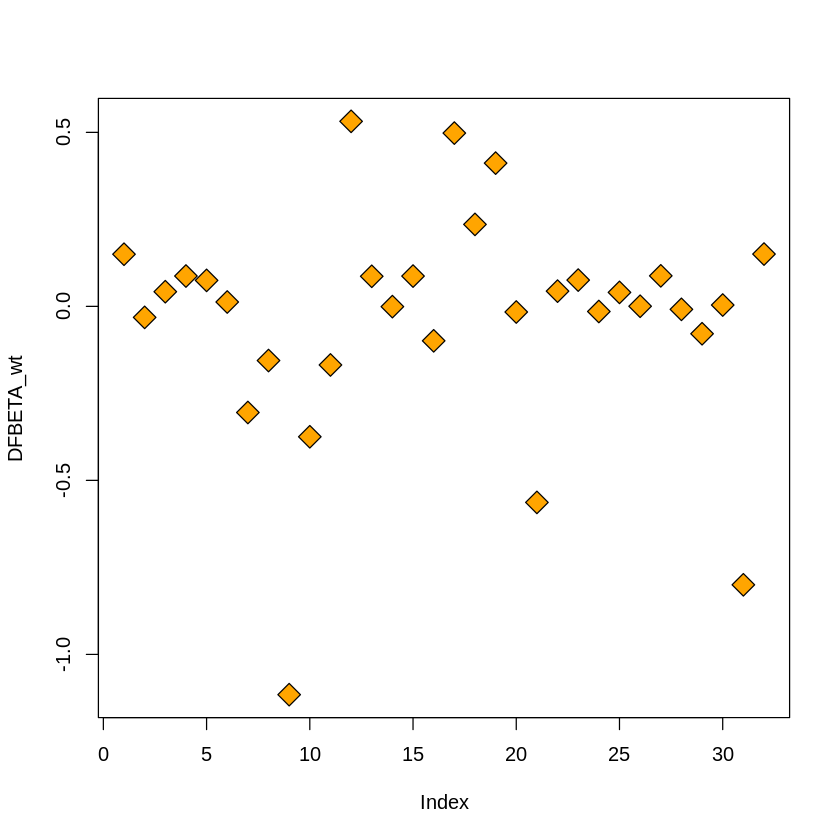

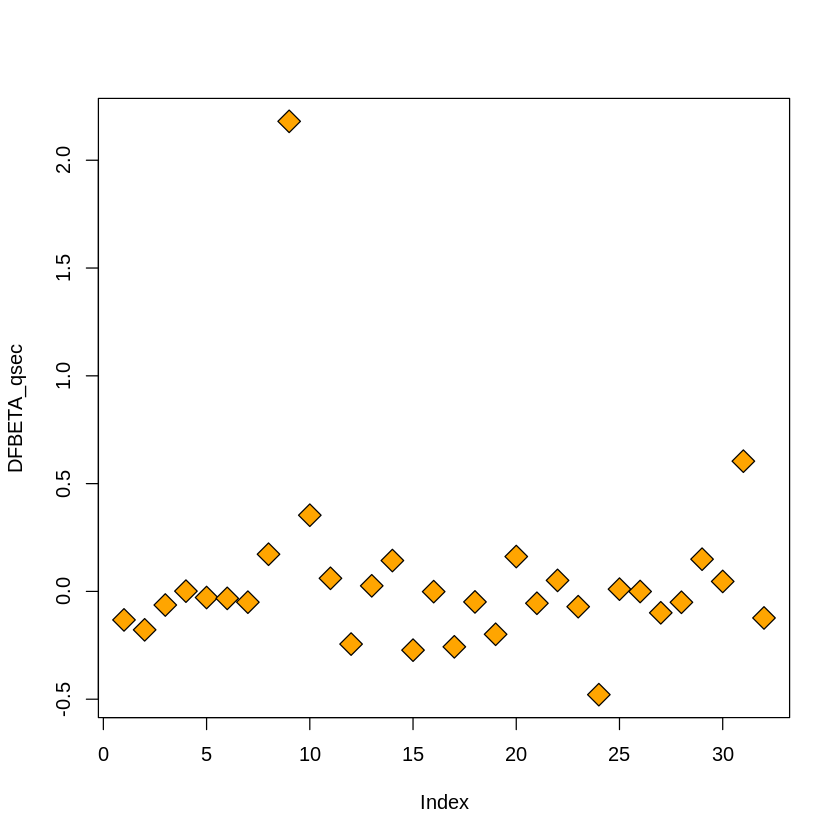

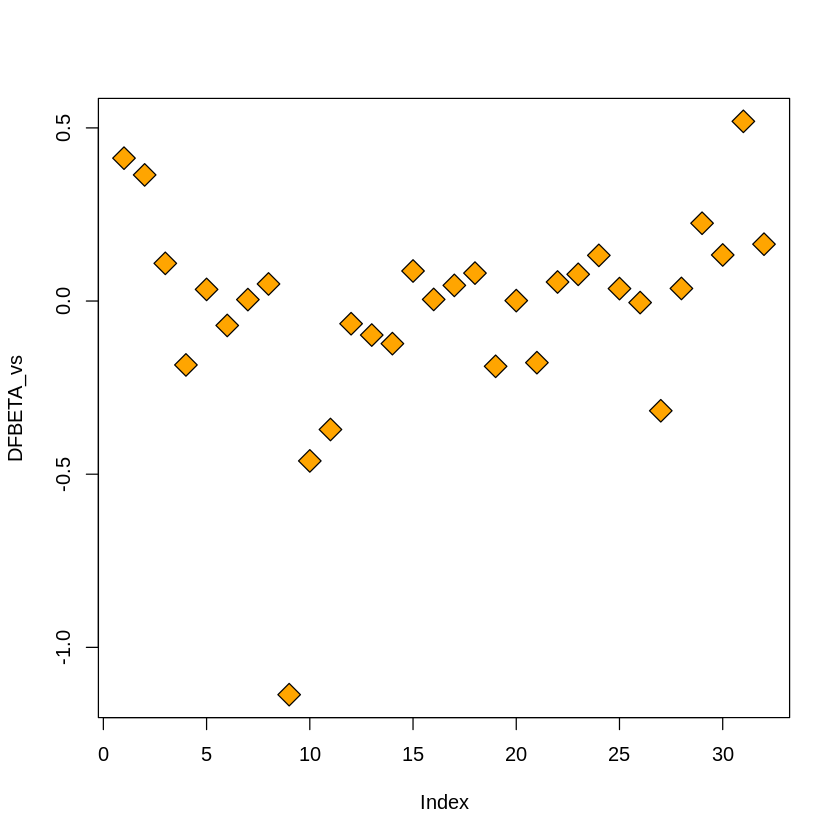

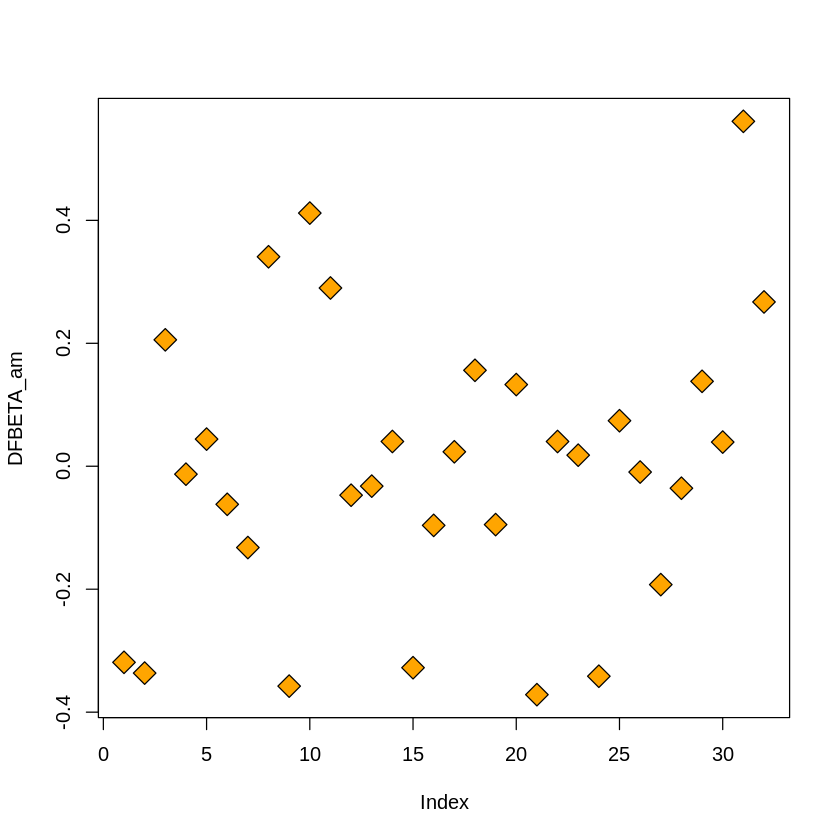

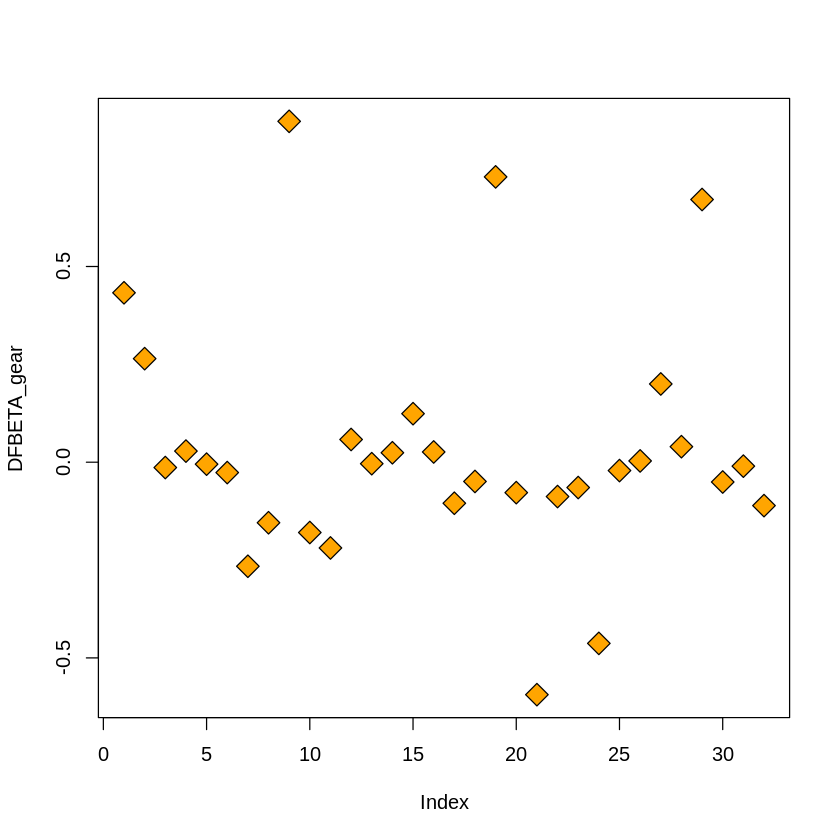

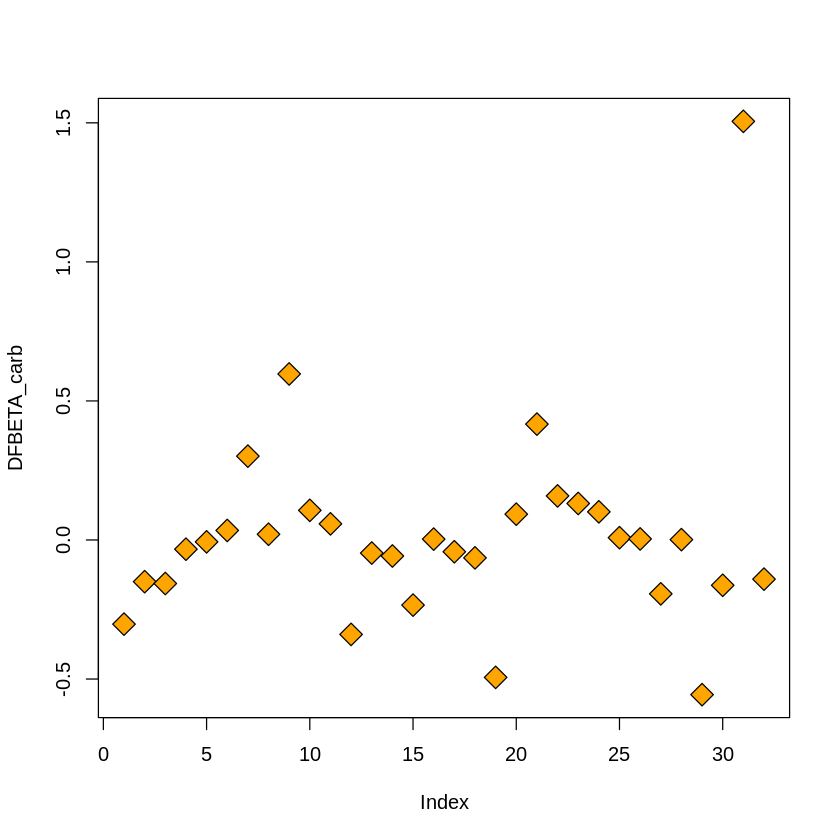

In [ ]:
for (j in 1:ncol(df) ) {  
  plot(dfbetas(fit)[,j], pch=23, bg='orange', cex=2, ylab=paste0("DFBETA","_",names(df)[j] )  )
}

In [ ]:
#아웃라이어 기준점 생성
dfbeta_threshold= 2/sqrt(n)  # sample size 개수는 같아서 

In [ ]:
# 1. fit
for (j in 1:ncol(df) ) {  
  df[which(abs(dfbetas(fit)[,j]) >dfbeta_threshold),] %>% rownames%>% print
}

[1] "Merc 230"      "Honda Civic"   "Toyota Corona" "Maserati Bora"
[1] "Merc 230"          "Chrysler Imperial" "Toyota Corona"    
[4] "Ford Pantera L"   
[1] "Merc 450SE"         "Cadillac Fleetwood" "Toyota Corona"     
[4] "Ford Pantera L"    
[1] "Merc 230"           "Merc 280"           "Merc 450SE"        
[4] "Cadillac Fleetwood" "Honda Civic"        "Maserati Bora"     
[1] "Merc 230"       "Honda Civic"    "Camaro Z28"     "Ford Pantera L"
[5] "Maserati Bora" 
[1] "Merc 230"          "Merc 280"          "Merc 450SE"       
[4] "Chrysler Imperial" "Honda Civic"       "Toyota Corona"    
[7] "Maserati Bora"    
[1] "Merc 230"      "Camaro Z28"    "Maserati Bora"
[1] "Mazda RX4"     "Mazda RX4 Wag" "Merc 230"      "Merc 280"     
[5] "Merc 280C"     "Maserati Bora"
[1] "Merc 230"      "Merc 280"      "Toyota Corona" "Maserati Bora"
[1] "Mazda RX4"      "Merc 230"       "Honda Civic"    "Toyota Corona" 
[5] "Camaro Z28"     "Ford Pantera L"
[1] "Merc 230"       "Honda Civic"    "

In [ ]:
output= vector(mode="character" ,ncol(df))
for (i in seq_along(df)){
      output[i] = df[which(abs(dfbetas(fit)[,i]) >dfbeta_threshold),] %>% rownames %>% as.data.frame      
    }
output

[[1]]
[1] "Merc 230"      "Honda Civic"   "Toyota Corona" "Maserati Bora"

[[2]]
[1] "Merc 230"          "Chrysler Imperial" "Toyota Corona"    
[4] "Ford Pantera L"   

[[3]]
[1] "Merc 450SE"         "Cadillac Fleetwood" "Toyota Corona"     
[4] "Ford Pantera L"    

[[4]]
[1] "Merc 230"           "Merc 280"           "Merc 450SE"        
[4] "Cadillac Fleetwood" "Honda Civic"        "Maserati Bora"     

[[5]]
[1] "Merc 230"       "Honda Civic"    "Camaro Z28"     "Ford Pantera L"
[5] "Maserati Bora" 

[[6]]
[1] "Merc 230"          "Merc 280"          "Merc 450SE"       
[4] "Chrysler Imperial" "Honda Civic"       "Toyota Corona"    
[7] "Maserati Bora"    

[[7]]
[1] "Merc 230"      "Camaro Z28"    "Maserati Bora"

[[8]]
[1] "Mazda RX4"     "Mazda RX4 Wag" "Merc 230"      "Merc 280"     
[5] "Merc 280C"     "Maserati Bora"

[[9]]
[1] "Merc 230"      "Merc 280"      "Toyota Corona" "Maserati Bora"

[[10]]
[1] "Mazda RX4"      "Merc 230"       "Honda Civic"    "Toyota Corona" 
[5] "Camaro Z28"     "Ford Pantera L"

[[11]]
[1] "Merc 230"       "Honda Civic"    "Toyota Corona"  "Ford Pantera L"
[5] "Maserati Bora"

In [ ]:
output %>% unlist -> output_vec

In [ ]:
#output_vec %>% unique 
output_vec %>% unique %>% sort 

[1] "Cadillac Fleetwood" "Camaro Z28"         "Chrysler Imperial" 
 [4] "Ford Pantera L"     "Honda Civic"        "Maserati Bora"     
 [7] "Mazda RX4"          "Mazda RX4 Wag"      "Merc 230"          
[10] "Merc 280"           "Merc 280C"          "Merc 450SE"        
[13] "Toyota Corona"

'Cadillac Fleetwood' 'Camaro Z28' 'Chrysler Imperial' 'Ford Pantera L' `'Honda Civic'` `'Maserati Bora'` 'Mazda RX4' 'Mazda RX4 Wag' `'Merc 230'` 'Merc 280' 'Merc 280C' 'Merc 450SE' `'Toyota Corona'`



In [ ]:
# 2. fit2
for (j in 1:ncol(df_sq) ) {  
  df_sq[which(abs(dfbetas(fit2)[,j]) >dfbeta_threshold),] %>% rownames%>% print
}

[1] "Datsun 710"     "Hornet 4 Drive" "Duster 360"     "Camaro Z28"    
[5] "Porsche 914-2"  "Ferrari Dino"   "Volvo 142E"    
[1] "Duster 360"        "Chrysler Imperial" "Honda Civic"      
[4] "AMC Javelin"       "Porsche 914-2"     "Ferrari Dino"     
[1] "Valiant"       "Duster 360"    "Merc 240D"     "Honda Civic"  
[5] "Porsche 914-2" "Lotus Europa"  "Ferrari Dino"  "Maserati Bora"
[9] "Volvo 142E"   
[1] "Hornet 4 Drive" "Duster 360"     "Merc 240D"      "Honda Civic"   
[5] "Porsche 914-2"  "Lotus Europa"   "Ferrari Dino"   "Maserati Bora" 
[1] "Valiant"       "Duster 360"    "Merc 240D"     "Honda Civic"  
[5] "AMC Javelin"   "Porsche 914-2" "Ferrari Dino" 
[1] "Honda Civic"   "AMC Javelin"   "Porsche 914-2" "Lotus Europa" 
[5] "Ferrari Dino"  "Maserati Bora" "Volvo 142E"   
[1] "Valiant"       "AMC Javelin"   "Camaro Z28"    "Porsche 914-2"
[5] "Ferrari Dino" 
[1] "Duster 360"     "Honda Civic"    "AMC Javelin"    "Porsche 914-2" 
[5] "Lotus Europa"   "Ford Pantera L" "Volvo 

ERROR: ignored

어떤 행 부터는 조건에 해당하는 값이 없음을 알 수 있음 

In [ ]:
 #df_sq[which(abs(dfbetas(fit2)[,19]) >dfbeta_threshold),] %>% rownames %>% as.data.frame

.
<chr>
Datsun 710
Duster 360
Honda Civic
AMC Javelin
Porsche 914-2
Lotus Europa
Maserati Bora
Volvo 142E


어디까진지 인덱스 값 확인함

In [ ]:
output2= vector(mode="character" ,19)
for (i in 1:19){
      output2[i] = df_sq[which(abs(dfbetas(fit2)[,i]) >dfbeta_threshold),] %>% rownames %>% as.data.frame       
    }
output2

[[1]]
[1] "Datsun 710"     "Hornet 4 Drive" "Duster 360"     "Camaro Z28"    
[5] "Porsche 914-2"  "Ferrari Dino"   "Volvo 142E"    

[[2]]
[1] "Duster 360"        "Chrysler Imperial" "Honda Civic"      
[4] "AMC Javelin"       "Porsche 914-2"     "Ferrari Dino"     

[[3]]
[1] "Valiant"       "Duster 360"    "Merc 240D"     "Honda Civic"  
[5] "Porsche 914-2" "Lotus Europa"  "Ferrari Dino"  "Maserati Bora"
[9] "Volvo 142E"   

[[4]]
[1] "Hornet 4 Drive" "Duster 360"     "Merc 240D"      "Honda Civic"   
[5] "Porsche 914-2"  "Lotus Europa"   "Ferrari Dino"   "Maserati Bora" 

[[5]]
[1] "Valiant"       "Duster 360"    "Merc 240D"     "Honda Civic"  
[5] "AMC Javelin"   "Porsche 914-2" "Ferrari Dino" 

[[6]]
[1] "Honda Civic"   "AMC Javelin"   "Porsche 914-2" "Lotus Europa" 
[5] "Ferrari Dino"  "Maserati Bora" "Volvo 142E"   

[[7]]
[1] "Valiant"       "AMC Javelin"   "Camaro Z28"    "Porsche 914-2"
[5] "Ferrari Dino" 

[[8]]
[1] "Duster 360"     "Honda Civic"    "AMC Javelin"    "Porsche 914-2" 
[5] "Lotus Europa"   "Ford Pantera L" "Volvo 142E"    

[[9]]
[1] "Merc 240D"     "AMC Javelin"   "Porsche 914-2" "Volvo 142E"   

[[10]]
[1] "Datsun 710"    "Merc 240D"     "Honda Civic"   "Toyota Corona"
[5] "AMC Javelin"   "Ferrari Dino"  "Volvo 142E"   

[[11]]
[1] "Datsun 710"    "Duster 360"    "Honda Civic"   "AMC Javelin"  
[5] "Porsche 914-2" "Lotus Europa"  "Maserati Bora" "Volvo 142E"   

[[12]]
[1] "Duster 360"        "Merc 240D"         "Chrysler Imperial"
[4] "Honda Civic"       "Toyota Corolla"    "AMC Javelin"      
[7] "Porsche 914-2"     "Ferrari Dino"     

[[13]]
 [1] "Hornet 4 Drive" "Valiant"        "Duster 360"     "Merc 240D"     
 [5] "Honda Civic"    "Porsche 914-2"  "Lotus Europa"   "Ferrari Dino"  
 [9] "Maserati Bora"  "Volvo 142E"    

[[14]]
[1] "Hornet 4 Drive" "Merc 240D"      "AMC Javelin"    "Porsche 914-2" 
[5] "Lotus Europa"   "Ferrari Dino"   "Maserati Bora" 

[[15]]
[1] "Valiant"       "Honda Civic"   "AMC Javelin"   "Porsche 914-2"
[5] "Lotus Europa"  "Ferrari Dino" 

[[16]]
[1] "Duster 360"        "Chrysler Imperial" "Honda Civic"      
[4] "AMC Javelin"       "Lotus Europa"      "Ferrari Dino"     
[7] "Volvo 142E"       

[[17]]
[1] "Valiant"       "Merc 230"      "AMC Javelin"   "Camaro Z28"   
[5] "Porsche 914-2" "Ferrari Dino" 

[[18]]
[1] "Datsun 710"    "Merc 240D"     "Toyota Corona" "Porsche 914-2"
[5] "Ferrari Dino" 

[[19]]
[1] "Datsun 710"    "Duster 360"    "Honda Civic"   "AMC Javelin"  
[5] "Porsche 914-2" "Lotus Europa"  "Maserati Bora" "Volvo 142E"

In [ ]:
output2 %>% unlist -> output2_vec

In [ ]:
output_vec %>% unique %>% sort 

[1] "Cadillac Fleetwood" "Camaro Z28"         "Chrysler Imperial" 
 [4] "Ford Pantera L"     "Honda Civic"        "Maserati Bora"     
 [7] "Mazda RX4"          "Mazda RX4 Wag"      "Merc 230"          
[10] "Merc 280"           "Merc 280C"          "Merc 450SE"        
[13] "Toyota Corona"

'Cadillac Fleetwood' 'Camaro Z28' 'Chrysler Imperial' 'Ford Pantera L' `'Honda Civic'` `'Maserati Bora'` 'Mazda RX4' 'Mazda RX4 Wag' `'Merc 230'` 'Merc 280' 'Merc 280C' 'Merc 450SE' `'Toyota Corona'`

## ▶ 결론
1. 샘플 수 얼마 없음
2.  fit1-> Merc 230 , Maserati Bora , Honda Civic 
3.  fit2-> Porsche 914-2 , Honda Civic , Maserati Bora

In [ ]:
#dimnames(df)
dimnames(df)[[1]]

[1] "Mazda RX4"           "Mazda RX4 Wag"       "Datsun 710"         
 [4] "Hornet 4 Drive"      "Hornet Sportabout"   "Valiant"            
 [7] "Duster 360"          "Merc 240D"           "Merc 230"           
[10] "Merc 280"            "Merc 280C"           "Merc 450SE"         
[13] "Merc 450SL"          "Merc 450SLC"         "Cadillac Fleetwood" 
[16] "Lincoln Continental" "Chrysler Imperial"   "Fiat 128"           
[19] "Honda Civic"         "Toyota Corolla"      "Toyota Corona"      
[22] "Dodge Challenger"    "AMC Javelin"         "Camaro Z28"         
[25] "Pontiac Firebird"    "Fiat X1-9"           "Porsche 914-2"      
[28] "Lotus Europa"        "Ford Pantera L"      "Ferrari Dino"       
[31] "Maserati Bora"       "Volvo 142E"

# 아웃라이어 제거 후 피팅 

In [ ]:
#df %>% filter ( ! dimnames(df)[[1]] %in% c("Merc 230" , "Maserati Bora" , "Honda Civic") ) 
df %>% filter ( ! dimnames(df)[[1]] %in% c("Merc 230" , "Maserati Bora" , "Honda Civic") ) -> df_new

In [ ]:
fit_new=lm(hp~., df_new)
summary(fit_new)


Call:
lm(formula = hp ~ ., data = df_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12354 -0.04079  0.01099  0.05301  0.09905 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.25425    0.16785   1.515   0.1472  
mpg         -0.05773    0.14811  -0.390   0.7013  
cyl          0.10439    0.11540   0.905   0.3776  
disp         0.35290    0.21106   1.672   0.1118  
drat         0.10311    0.12147   0.849   0.4071  
wt           0.03341    0.28359   0.118   0.9075  
qsec        -0.61626    0.30023  -2.053   0.0549 .
vs           0.14378    0.06853   2.098   0.0503 .
am           0.02410    0.06199   0.389   0.7020  
gear        -0.09485    0.09810  -0.967   0.3464  
carb         0.17109    0.18737   0.913   0.3733  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07396 on 18 degrees of freedom
Multiple R-squared:   0.92,	Adjusted R-squared:  0.8755 
F-statistic:  20.7 on 10 and 18 DF,  p-valu

 0.8565 -> 0.8755로  adj R^2 값이 오르긴 함 

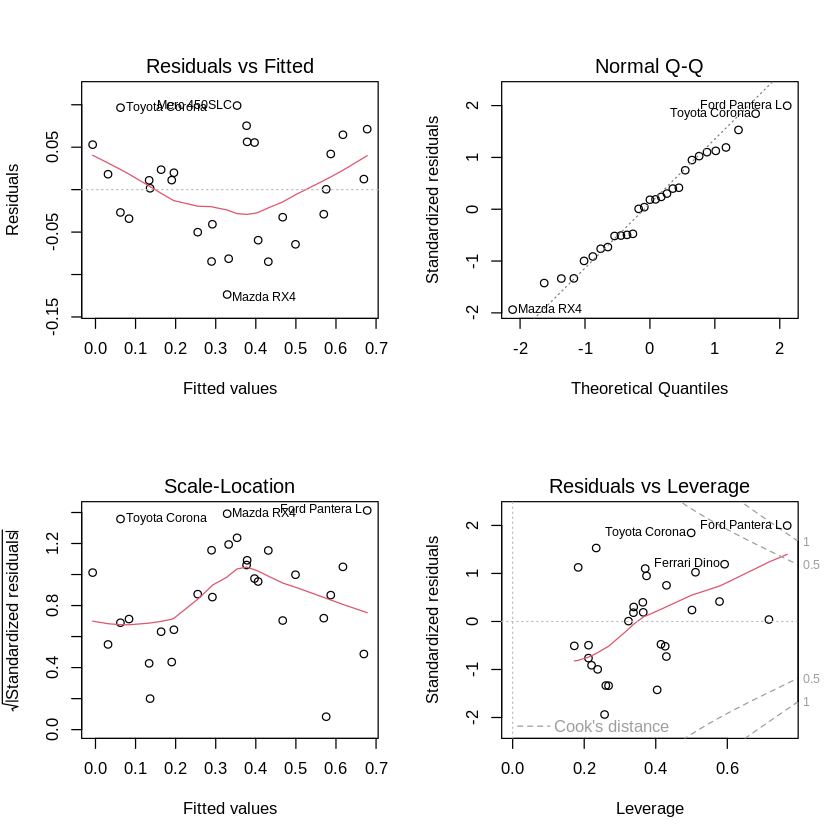

In [ ]:
par(mfrow=c(2,2))
plot(fit_new)

In [12]:
df_sq %>% filter ( ! dimnames(df)[[1]] %in% c("Porsche 914-2" , "Honda Civic" , "Maserati Bora") ) -> df_sq_new

In [13]:
fit2_new=lm(hp~., df_sq_new)
summary(fit2_new)


Call:
lm(formula = hp ~ ., data = df_sq_new)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0259775 -0.0077971 -0.0009133  0.0117613  0.0279541 

Coefficients: (2 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.218117   0.119162  -1.830 0.097108 .  
mpg          0.245206   0.144969   1.691 0.121630    
cyl         -0.318663   0.137154  -2.323 0.042526 *  
disp         0.466410   0.408363   1.142 0.280003    
drat         0.288501   0.166491   1.733 0.113794    
wt          -0.052581   0.274020  -0.192 0.851671    
qsec        -0.611395   0.249989  -2.446 0.034512 *  
vs           0.330390   0.041669   7.929 1.27e-05 ***
am           0.239978   0.038948   6.161 0.000107 ***
gear        -0.705488   0.121444  -5.809 0.000171 ***
carb         0.768179   0.159364   4.820 0.000702 ***
mpg_sq      -0.218101   0.117276  -1.860 0.092557 .  
cyl_sq       0.672640   0.104220   6.454 7.31e-05 ***
disp_sq     -0.199

- Adjusted R-squared:  0.9787  -> 0.9879  향상 
- vs, am은 1과 0의 값을 가져서 _sq가 NA로 뜬 것 같음 

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


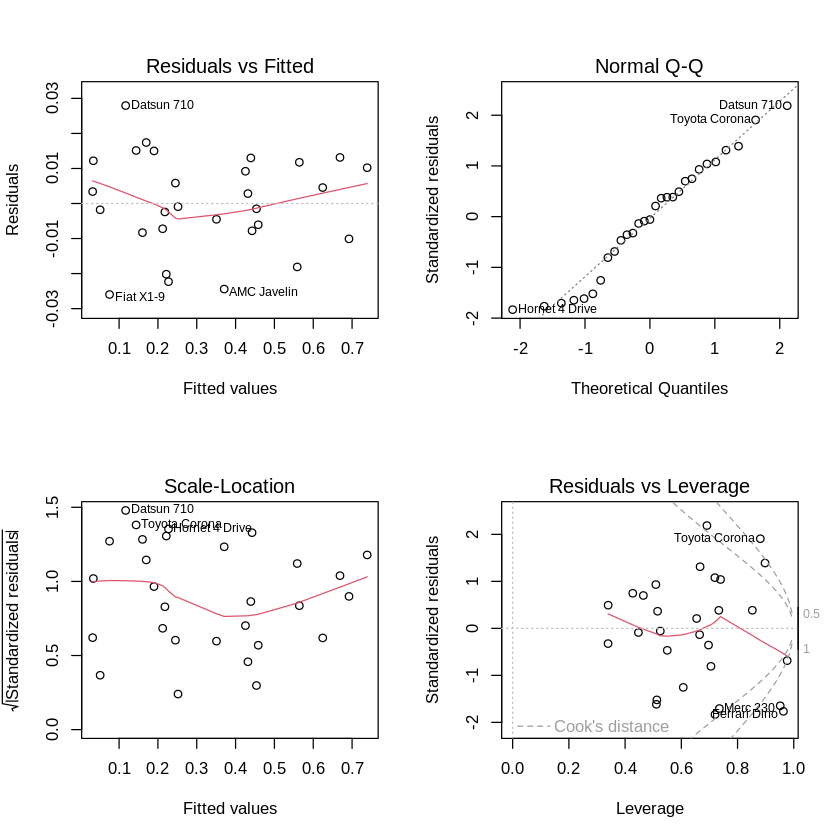

In [ ]:
par(mfrow=c(2,2))
plot( fit2_new)

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


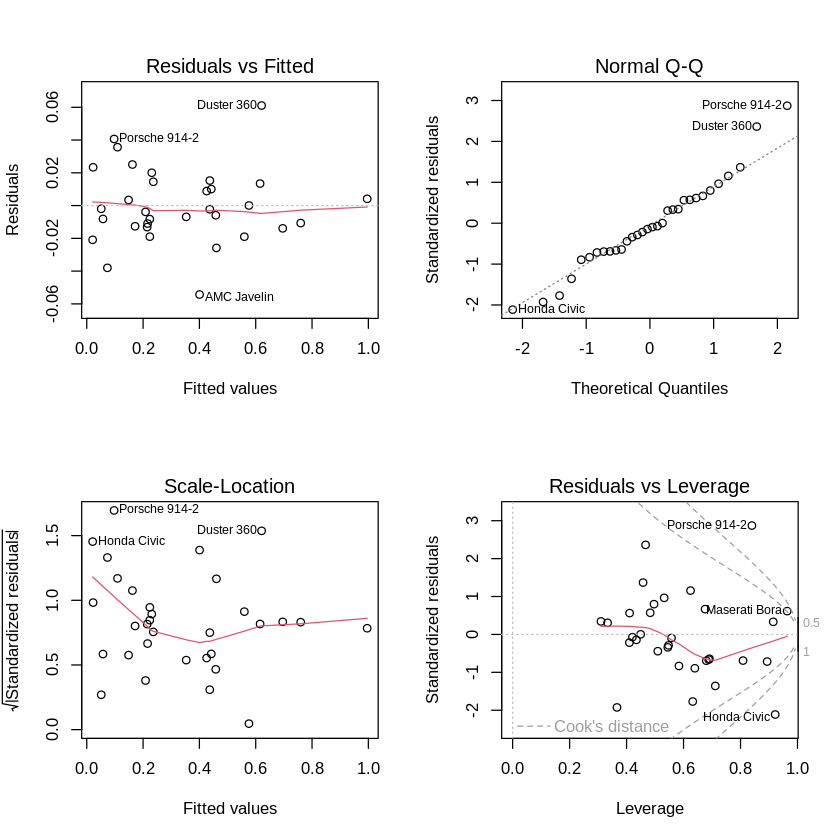

In [ ]:
#비교
par(mfrow=c(2,2))
plot(fit2)

## 결론
1. adj R_sq 값이 0.009 향상되긴 했지만
2. 샘플 수 얼마 없어서
3. 아웃라이어 제거하지 않고 그냥 함

In [24]:
#round(0.9879 - 0.9787, 3)

[1] 0.009

# 셀렉션

In [26]:
#install.packages("leaps")
library(leaps)

In [97]:
fit2_sub = regsubsets(hp~.,df_sq)

In [ ]:
#summary(fit2_sub)  %>% str

In [99]:
 summary(fit2_sub)  $ adjr2 

[1] 0.7020464 0.8930960 0.9031745 0.9203590 0.9333456 0.9548373 0.9585509
[8] 0.9599478

In [100]:
summary(fit2_sub)  $ cp

[1] 390.93322 119.30041 103.06407  78.78021  61.22262  34.91698  30.62310
[8]  29.17470

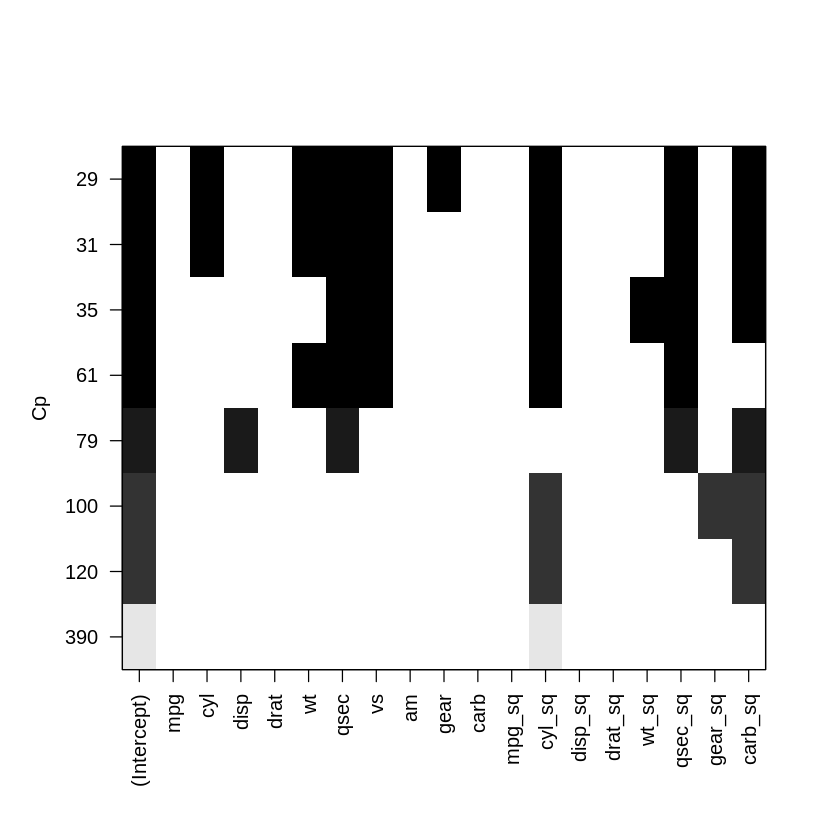

In [101]:
plot(fit2_sub, scale="Cp")

In [102]:
fit_cp= lm(hp~ cyl+ wt+ qsec+ vs+ gear+ cyl_sq+qsec_sq+ carb_sq, df_sq)
summary(fit_cp)


Call:
lm(formula = hp ~ cyl + wt + qsec + vs + gear + cyl_sq + qsec_sq + 
    carb_sq, data = df_sq)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.104140 -0.021419  0.004745  0.030071  0.070798 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.42703    0.08853   4.823 7.23e-05 ***
cyl         -0.25475    0.10091  -2.525 0.018936 *  
wt           0.34660    0.07538   4.598 0.000127 ***
qsec        -1.43866    0.22994  -6.257 2.20e-06 ***
vs           0.14765    0.03763   3.924 0.000680 ***
gear        -0.07284    0.05374  -1.355 0.188461    
cyl_sq       0.42510    0.08982   4.733 9.06e-05 ***
qsec_sq      0.90554    0.17051   5.311 2.17e-05 ***
carb_sq      0.31167    0.07424   4.198 0.000344 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04849 on 23 degrees of freedom
Multiple R-squared:  0.9703,	Adjusted R-squared:  0.9599 
F-statistic: 93.87 on 8 and 23 DF,  p-value: 1.032e-15


In [103]:
fit_cp2= lm(hp~ cyl+ wt+ qsec+ vs+ cyl_sq+qsec_sq+ carb_sq, df_sq)
summary(fit_cp2)


Call:
lm(formula = hp ~ cyl + wt + qsec + vs + cyl_sq + qsec_sq + carb_sq, 
    data = df_sq)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.108678 -0.018957 -0.002217  0.026640  0.084666 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.32800    0.05086   6.449 1.14e-06 ***
cyl         -0.21514    0.09825  -2.190 0.038506 *  
wt           0.34384    0.07665   4.486 0.000154 ***
qsec        -1.26210    0.19275  -6.548 9.00e-07 ***
vs           0.14614    0.03827   3.819 0.000831 ***
cyl_sq       0.44361    0.09031   4.912 5.19e-05 ***
qsec_sq      0.80039    0.15447   5.182 2.63e-05 ***
carb_sq      0.27809    0.07119   3.906 0.000668 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04932 on 24 degrees of freedom
Multiple R-squared:  0.9679,	Adjusted R-squared:  0.9586 
F-statistic: 103.4 on 7 and 24 DF,  p-value: 2.326e-16


-> 최종 모형으로 선택

In [120]:
#X = model.matrix(fit2)[,-1]
#fit_leaps = leaps(X, df_sq$hp, nbest=3, method='Cp')
#fit_leaps 

# 피팅

In [132]:
set.seed(2022)
ind=sample(1:nrow(df_sq), nrow(df_sq)*0.7, replace= FALSE)
train= df_sq[ind,]
test= df_sq[-ind,]

In [137]:
fit_train= lm(hp~ cyl+ wt+ qsec+ vs+ gear+ cyl_sq+qsec_sq+ carb_sq, train)
summary(fit_train)


Call:
lm(formula = hp ~ cyl + wt + qsec + vs + gear + cyl_sq + qsec_sq + 
    carb_sq, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073483 -0.015330  0.001818  0.017580  0.060836 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.40242    0.10585   3.802  0.00220 **
cyl         -0.33809    0.11085  -3.050  0.00930 **
wt           0.30822    0.11239   2.742  0.01678 * 
qsec        -1.14719    0.35120  -3.267  0.00613 **
vs           0.12831    0.05133   2.500  0.02661 * 
gear        -0.24639    0.07610  -3.238  0.00648 **
cyl_sq       0.44653    0.10683   4.180  0.00108 **
qsec_sq      0.74837    0.23452   3.191  0.00709 **
carb_sq      0.72742    0.20789   3.499  0.00392 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0415 on 13 degrees of freedom
Multiple R-squared:  0.9662,	Adjusted R-squared:  0.9454 
F-statistic: 46.41 on 8 and 13 DF,  p-value: 2.546e-08


In [150]:
pred= predict(fit_train, test, type="response")

In [163]:
?predict

In [143]:
#install.packages("caret")
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift




In [151]:
caret::confusionMatrix( as.factor(pred), as.factor(test$hp)  )

ERROR: ignored

In [177]:
as.factor(pred)  %>% names

[1] "Datsun 710"         "Merc 240D"          "Cadillac Fleetwood"
 [4] "Chrysler Imperial"  "Toyota Corolla"     "Camaro Z28"        
 [7] "Porsche 914-2"      "Lotus Europa"       "Ford Pantera L"    
[10] "Maserati Bora"

In [153]:
as.factor(test$hp)

[1] 0.144876325088339  0.0353356890459364 0.540636042402827  0.628975265017668 
 [5] 0.0459363957597173 0.681978798586572  0.137809187279152  0.215547703180212 
 [9] 0.749116607773852  1                 
10 Levels: 0.0353356890459364 0.0459363957597173 ... 1